In [177]:
import os
import pandas as pd
import tifffile as tff
import openpyxl
import xlsxwriter
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import math
import scikit_posthocs as sp

In [2]:
# directory containing excel file with morphometric output from FIJI 3D Suite
dir_3D_suite = "C:/Users/Mary/Documents/Shared folder/Data/SXT/ML segmentation tiffs/Morphometric analysis/New 3D Suite analysis/3D Suite Measurements/"
data_dir = dir_3D_suite + "by strain/scaled sorted filtered/"
vol_rat_dir = dir_3D_suite + "Volumes and ratios/"


In [57]:
# import data tables

all_cell = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Cell')
all_vac = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
all_nuc = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
all_ld = pd.read_excel(data_dir + 'All Strains 3D Suite_Filtered.xlsx', sheet_name='LD')

wt_cell = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Cell')
wt_vac = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
wt_nuc = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
wt_ld = pd.read_excel(data_dir + 'WT 3D Suite_Filtered.xlsx', sheet_name='LD')

vph1_cell = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Cell')
vph1_vac = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
vph1_nuc = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
vph1_ld = pd.read_excel(data_dir + 'VPH1-GFP 3D Suite_Filtered.xlsx', sheet_name='LD')

vac14_cell = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Cell')
vac14_vac = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Vacuole')
vac14_nuc = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='Nucleus')
vac14_ld = pd.read_excel(data_dir + 'vac14 3D Suite_Filtered.xlsx', sheet_name='LD')


In [72]:
# wt_nuc = wt_nuc.drop([287,288,289,290])
wt_nuc

,index,Cell ID,Object ID,Volume(Pix),Volume (um^3),Volume (um^3)_ManCalc,CX(pix),CY(pix),CZ(pix),CX (um),...,Compactness(Pix),CompactCorr(Pix),Sphericity(Unit),Sphericity(Pix),SpherCorr(Pix),EllSpareness,EllElon,EllFlatness,Unnamed: 40,Unnamed: 41
0,0.0,BY471A_1026_1_10_pre_rec_0_multi_bin_NUC,BY471A_1026_1_10_pre_rec_0_multi_bin_NUC.tiff_1,42266.0,1.26798,1.141182,48.897,53.781,56.966,1.46691,...,0.293,1.001,0.664,0.664,1.000,0.993,1.098,1.085,NaN,NaN
1,1.0,BY471A_1026_1_10_pre_rec_10_multi_bin_NUC,BY471A_1026_1_10_pre_rec_10_multi_bin_NUC.tiff_1,50832.0,1.52496,1.372464,61.510,86.208,56.274,1.84530,...,0.285,0.992,0.658,0.658,0.997,0.995,1.145,1.101,NaN,NaN
2,2.0,BY471A_1026_1_10_pre_rec_13_multi_bin_NUC,BY471A_1026_1_10_pre_rec_13_multi_bin_NUC.tiff_1,23958.0,0.71874,0.646866,91.872,53.650,98.168,2.75616,...,0.207,0.708,0.591,0.591,0.891,0.948,1.197,1.398,NaN,NaN
3,3.0,BY471A_1026_1_10_pre_rec_15_multi_bin_NUC,BY471A_1026_1_10_pre_rec_15_multi_bin_NUC.tiff_1,34862.0,1.04586,0.941274,72.923,77.462,76.164,2.18769,...,0.265,0.929,0.642,0.642,0.976,0.988,1.284,1.171,NaN,NaN
4,4.0,BY471A_1026_1_10_pre_rec_19_multi_bin_NUC,BY471A_1026_1_10_pre_rec_19_multi_bin_NUC.tiff_1,51073.0,1.53219,1.378971,54.114,56.211,78.680,1.62342,...,0.287,0.988,0.660,0.660,0.996,0.992,1.096,1.119,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,357.0,BY471_wt_1359_2_pre_rec_26_multi_bin_NUC,BY471_wt_1359_2_pre_rec_26_multi_bin_NUC.tiff_1,67059.0,2.01177,1.810593,100.011,109.847,90.553,3.00033,...,0.235,0.845,0.617,0.617,0.945,0.972,1.351,1.368,NaN,NaN
283,358.0,BY471_wt_1359_2_pre_rec_38_multi_bin_NUC,BY471_wt_1359_2_pre_rec_38_multi_bin_NUC.tiff_1,28586.0,0.85758,0.771822,105.893,62.026,79.471,3.17679,...,0.266,0.854,0.643,0.643,0.949,0.984,1.172,1.598,NaN,NaN
284,359.0,BY471_wt_1359_2_pre_rec_41_multi_bin_NUC,BY471_wt_1359_2_pre_rec_41_multi_bin_NUC.tiff_1,22113.0,0.66339,0.597051,70.181,52.824,55.381,2.10543,...,0.272,0.969,0.648,0.648,0.990,0.984,1.174,1.098,NaN,NaN
285,360.0,BY471_wt_1359_2_pre_rec_42_multi_bin_NUC,BY471_wt_1359_2_pre_rec_42_multi_bin_NUC.tiff_1,52107.0,1.56321,1.406889,59.556,68.785,45.226,1.78668,...,0.282,0.952,0.655,0.655,0.984,0.990,1.137,1.202,NaN,NaN


### Fig. 4A-D ###

Text(0.5, 1.0, 'LD')

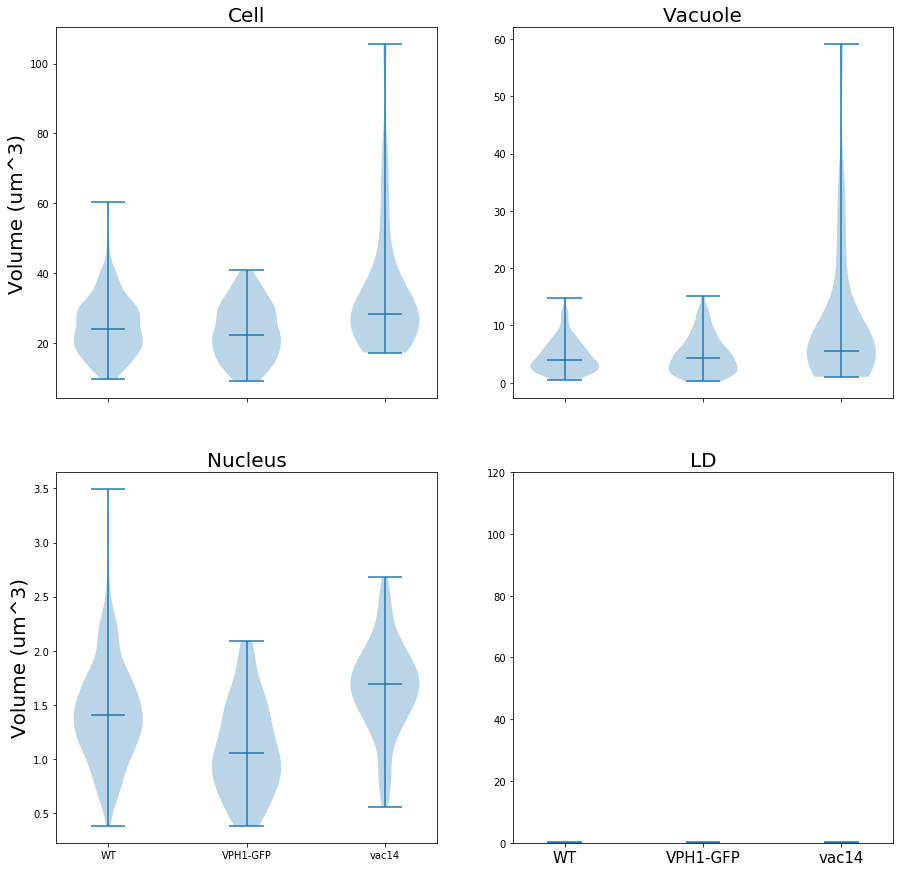

In [278]:
# organelle volume strain-comparison plots
# "ManCalc" refers to manually calculated volumes (# voxels * known voxel size) to validate against automatically calculated volumes 
# output by FIJI #

vols_list = [wt_cell['Volume (um^3)_ManCalc'],vph1_cell['Volume (um^3)_ManCalc'],vac14_cell['Volume (um^3)_ManCalc'], 
             wt_vac['Volume (um^3)_ManCalc'],vph1_vac['Volume (um^3)_ManCalc'],vac14_vac['Volume (um^3)_ManCalc'],
             wt_nuc['Volume (um^3)_ManCalc'],vph1_nuc['Volume (um^3)_ManCalc'],vac14_nuc['Volume (um^3)_ManCalc'],
             wt_ld['Volume (um^3)_ManCalc'],vph1_ld['Volume (um^3)_ManCalc'],vac14_ld['Volume (um^3)_ManCalc']]

fig,axs = plt.subplots(2,2,squeeze=False,sharex=True,figsize=(15,15))
strains = ['WT','VPH1-GFP','vac14']
plt.xticks(ticks=[1,2,3],labels=strains,fontsize=15)

axs[0,0].violinplot(vols_list[0:3],showmedians=True)
axs[0,0].set_title('Cell',fontsize=20)
axs[0,0].set_ylabel('Volume (um^3)',fontsize=20)

axs[0,1].violinplot(vols_list[3:6],showmedians=True)
axs[0,1].set_title('Vacuole',fontsize=20)

axs[1,0].violinplot(vols_list[6:9],showmedians=True)
axs[1,0].set_title('Nucleus',fontsize=20)
axs[1,0].set_ylabel('Volume (um^3)',fontsize=20)

axs[1,1].violinplot(vols_list[9:12],showmedians=True)
axs[1,1].set_title('LD',fontsize=20)

# fix the spacing, size, color/line thickness?
# statistical comparisons?


# output_dir = 'C:/Users/Mary/Documents/Shared folder/Data/SXT/Technical paper/Figures/'
# output_dir = 'C:/Users/Mary/Documents/Shared folder/Data/SXT/ML segmentation tiffs/Morphometric analysis/New 3D Suite analysis/3D Suite Measurements/Figures/Figures for SXT Tech paper/'

# plt.savefig(output_dir +'volume violins.jpg')

In [106]:
# Supplementary table 1. Summary Stats - 5/23/24

stats_table = pd.DataFrame(vols_list)
stats_table = stats_table.T
# stats_table['WT Cell Volume'] = wt_cell['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Cell Volume'] = vph1_cell['Volume (um^3)_ManCalc']
# stats_table['vac14 Cell Volume'] = vac14_cell['Volume (um^3)_ManCalc']
# stats_table['WT Vacuole Volume'] = wt_vac['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Vacuole Volume'] = vph1_vac['Volume (um^3)_ManCalc']
# stats_table['vac14 Vacuole Volume'] = vac14_vac['Volume (um^3)_ManCalc']
# stats_table['WT Nucleus Volume'] = wt_nuc['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP Nucleus Volume'] = vph1_nuc['Volume (um^3)_ManCalc']
# stats_table['vac14 Nucleus Volume'] = vac14_nuc['Volume (um^3)_ManCalc']
# stats_table['WT LD Volume'] = wt_ld['Volume (um^3)_ManCalc']
# stats_table['VPH1-GFP LD Volume'] = vph1_ld['Volume (um^3)_ManCalc']
# stats_table['vac14 LD Volume'] = vac14_ld['Volume (um^3)_ManCalc']

stats_table



,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc
0,18.262341,18.557964,42.678974,2.101950,2.736234,17.901004,1.141182,0.908550,1.573564,0.012096,0.001674,0.027156
1,20.149290,13.819896,26.822167,3.305610,1.473228,6.356608,1.372464,0.813213,1.909466,0.013095,0.000135,0.014476
2,26.547480,16.835175,26.069448,6.702966,1.795554,5.983549,0.646866,1.180332,1.561713,0.011853,0.017145,0.019145
3,13.132179,31.422816,22.325244,1.971162,8.993322,1.046050,0.941274,1.066878,1.556436,0.015903,0.002079,0.017515
4,20.004732,10.183158,34.051362,2.593593,1.209006,5.059937,1.378971,0.478737,2.440046,0.028431,0.037152,0.007155
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040905,NaN,NaN
1477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005022,NaN,NaN
1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003915,NaN,NaN
1479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006318,NaN,NaN


In [179]:
# - 5/23/24
# hypothesis testing - for each dataset, create a list containing normality, homoscedasticity, significance test & post-hoc

# calculate normality
shap_stat = []
shap_pval = []
norm = []

for d in vols_list:
    shapwilk_norm = stats.shapiro(d)
    shap_stat.append(shapwilk_norm[0])
    shap_pval.append(shapwilk_norm[1])
    if shapwilk_norm[1] < 0.05:
        norm.append('nonparametric')
    else:
        norm.append('parametric')

# shap_stat
# shap_pval
norm

['nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'nonparametric',
 'parametric',
 'nonparametric',
 'nonparametric',
 'nonparametric']

In [120]:
# - 5/23/24
sumstats_table = stats_table.describe()
sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
sumstats_table.loc['Parametricity'] = norm


sumstats_table
Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
Excelwriter.save()

In [182]:
# stats function - - 5/23/24
# input: list of datasets (lists or df columns of numbers)
# output: summary stats table

def calcstats_list(datalist):
    data_df = pd.DataFrame(datalist)
    data_df = data_df.T
    
    # calculate normality
    shap_stat = []
    shap_pval = []
    norm = []

    for d in datalist:
        shapwilk_norm = stats.shapiro(d)
        shap_stat.append(shapwilk_norm[0])
        shap_pval.append(shapwilk_norm[1])
        if shapwilk_norm[1] < 0.05:
            norm.append('nonparametric')
        else:
            norm.append('parametric')

    # shap_stat
    # shap_pval
    # norm
    
    sumstats_table = data_df.describe()
    sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
    sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
    sumstats_table.loc['Parametricity'] = norm
        
    return sumstats_table

#     Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
#     sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
#     Excelwriter.save()

In [183]:
#  5/23/24
calcstats(vols_list)

,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc,Volume (um^3)_ManCalc
count,287,138,65,287,138,65,287,138,65,1481,709,367
mean,24.8478,23.2806,34.4011,4.63173,4.90043,10.3368,1.43459,1.09654,1.65861,0.0175796,0.0108201,0.0173226
std,8.5542,8.08939,18.5027,2.89199,3.41576,12.2125,0.47744,0.428942,0.424892,0.0161639,0.0119028,0.0157521
min,9.57037,9.05985,17.2631,0.467856,0.280503,1.04605,0.379971,0.3807,0.559698,2.7e-05,2.7e-05,2.76258e-05
25%,18.4914,16.622,23.224,2.37978,2.0477,3.97516,1.12106,0.77708,1.42753,0.005454,0.003051,0.00705839
50%,23.9301,22.381,28.2169,3.91746,4.3139,5.49728,1.40689,1.05087,1.68838,0.014256,0.007722,0.0132327
75%,29.8636,29.5151,36.1393,6.24721,6.653,9.32353,1.69553,1.40398,1.90947,0.0245216,0.013932,0.0231366
max,60.2846,40.779,105.532,14.875,15.198,59.0821,3.49518,2.09023,2.68053,0.117457,0.1053,0.0978781
Shapiro-Wilk statistic,0.967061,0.974458,0.711674,0.92728,0.9245,0.668845,0.972449,0.969524,0.974428,0.84805,0.749589,0.827007
Shapiro-Wilk p-value,3.876e-06,0.0107913,5.35697e-10,1.25014e-10,1.04798e-06,7.85588e-11,2.52204e-05,0.00350608,0.196981,1.75337e-35,2.22115e-31,1.43765e-19


In [205]:
# hypothesis testing - WT vs vph1GFP; vph1-GFP vs vac14 - 5/23/24
tests = {'Cell - WT vs vph1-GFP':(vols_list[0],vols_list[1]), 'Cell - vph1-GFP vs vac14':(vols_list[1],vols_list[2]),
             'Vacuole - WT vs vph1-GFP':(vols_list[3],vols_list[4]), 'Vacuole - vph1-GFP vs vac14':(vols_list[4],vols_list[5]),
            'Nucleus - WT vs vph1-GFP':(vols_list[6],vols_list[7]), 'Nucleus - vph1-GFP vs vac14':(vols_list[7],vols_list[8]),
             'LD - WT vs vph1-GFP':(vols_list[9],vols_list[10]), 'LD - vph1-GFP vs vac14':(vols_list[10],vols_list[11])}

def sigtest(test_dict):

    mwu_stat = []
    ht_pval = []
    statsig = []
    testnames = []
    

    for d,v in test_dict.items():
    #     print(stats.levene(v[0],v[1])) #skip because all distributions are non-normal
        mwu = stats.mannwhitneyu(v[0],v[1])
        mwu_stat.append(mwu[0])
        ht_pval.append(mwu[1])
        if mwu[1] < 0.05:
            statsig.append('S')
        else:
            statsig.append('NS')
        testnames.append(d)
    #     print(v)
    
    results_df = pd.DataFrame(columns=test_dict)
    results_df.loc['Mann-Whitney U-test statistic'] = mwu_stat
    results_df.loc['p-value'] = ht_pval
    results_df.loc['Significant (p<0.05)'] = statsig

    return results_df



In [206]:
# - 5/23/24
sigtest(tests)

,Cell - WT vs vph1-GFP,Cell - vph1-GFP vs vac14,Vacuole - WT vs vph1-GFP,Vacuole - vph1-GFP vs vac14,Nucleus - WT vs vph1-GFP,Nucleus - vph1-GFP vs vac14,LD - WT vs vph1-GFP,LD - vph1-GFP vs vac14
Mann-Whitney U-test statistic,18049,2628,19583,3137,11766,1615,374659,90055
p-value,0.0695961,9.9634e-07,0.42657,0.00027956,6.11183e-12,1.00389e-13,9.04249e-28,5.81735e-17
Significant (p<0.05),NS,S,NS,S,S,S,S,S


In [164]:
hypotest = pd.DataFrame(columns=testnames)
hypotest.loc['Mann-Whitney U-test statistic'] = mwu_stat
hypotest.loc['p-value'] = ht_pval
hypotest.loc['Significant (p<0.05)'] = statsig

hypotest
Excelwriter = pd.ExcelWriter("Fig 3 Morpho statistics.xlsx", engine = 'xlsxwriter')
hypotest.to_excel(Excelwriter, sheet_name = 'Hypothesis tests', index=False)
Excelwriter.save()

### Fig 4E ###

In [241]:
# volume composition between strains

# ratio df

wt_vol_comp_df = pd.DataFrame()
wt_vol_comp_df['Cell Vol'] = wt_cell['Volume (um^3)']
wt_vol_comp_df['Vac Vol'] = wt_vac['Volume (um^3)']
wt_vol_comp_df['Nuc Vol'] = wt_nuc['Volume (um^3)']
wt_vol_comp_df['LD Vol'] = wt_ld['Volume (um^3)']
wt_vol_comp_df['V:Cell Vol'] = wt_vol_comp_df['Vac Vol']/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df['N:Cell Vol'] = wt_vol_comp_df['Nuc Vol']/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df['LD:Cell Vol'] = wt_vol_comp_df['LD Vol']/wt_vol_comp_df['Cell Vol']
wt_sum_orgs = wt_vol_comp_df['Vac Vol'] + wt_vol_comp_df['Nuc Vol'] + wt_vol_comp_df['LD Vol']
wt_vol_comp_df['Cyto:Cell Vol'] = (wt_vol_comp_df['Cell Vol']-wt_sum_orgs)/wt_vol_comp_df['Cell Vol']
wt_vol_comp_df

vph1_vol_comp_df = pd.DataFrame()
vph1_vol_comp_df['Cell Vol'] = vph1_cell['Volume (um^3)']
vph1_vol_comp_df['Vac Vol'] = vph1_vac['Volume (um^3)']
vph1_vol_comp_df['Nuc Vol'] = vph1_nuc['Volume (um^3)']
vph1_vol_comp_df['LD Vol'] = vph1_ld['Volume (um^3)']
vph1_vol_comp_df['V:Cell Vol'] = vph1_vol_comp_df['Vac Vol']/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df['N:Cell Vol'] = vph1_vol_comp_df['Nuc Vol']/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df['LD:Cell Vol'] = vph1_vol_comp_df['LD Vol']/vph1_vol_comp_df['Cell Vol']
vph1_sum_orgs = vph1_vol_comp_df['Vac Vol'] + vph1_vol_comp_df['Nuc Vol'] + vph1_vol_comp_df['LD Vol']
vph1_vol_comp_df['Cyto:Cell Vol'] = (vph1_vol_comp_df['Cell Vol']-vph1_sum_orgs)/vph1_vol_comp_df['Cell Vol']
vph1_vol_comp_df

vac14_vol_comp_df = pd.DataFrame()
vac14_vol_comp_df['Cell Vol'] = vac14_cell['Volume (um^3)']
vac14_vol_comp_df['Vac Vol'] = vac14_vac['Volume (um^3)']
vac14_vol_comp_df['Nuc Vol'] = vac14_nuc['Volume (um^3)']
vac14_vol_comp_df['LD Vol'] = vac14_ld['Volume (um^3)']
vac14_vol_comp_df['V:Cell Vol'] = vac14_vol_comp_df['Vac Vol']/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df['N:Cell Vol'] = vac14_vol_comp_df['Nuc Vol']/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df['LD:Cell Vol'] = vac14_vol_comp_df['LD Vol']/vac14_vol_comp_df['Cell Vol']
vac14_sum_orgs = vac14_vol_comp_df['Vac Vol'] + vac14_vol_comp_df['Nuc Vol'] + vac14_vol_comp_df['LD Vol']
vac14_vol_comp_df['Cyto:Cell Vol'] = (vac14_vol_comp_df['Cell Vol']-vac14_sum_orgs)/vac14_vol_comp_df['Cell Vol']
vac14_vol_comp_df

wt_vol_comp_df['V:Cell Vol'].mean()
vac_means = [wt_vol_comp_df['V:Cell Vol'].mean(),vph1_vol_comp_df['V:Cell Vol'].mean(),vac14_vol_comp_df['V:Cell Vol'].mean()]
nuc_means = [wt_vol_comp_df['N:Cell Vol'].mean(),vph1_vol_comp_df['N:Cell Vol'].mean(),vac14_vol_comp_df['N:Cell Vol'].mean()]
ld_means = [wt_vol_comp_df['LD:Cell Vol'].mean(),vph1_vol_comp_df['LD:Cell Vol'].mean(),vac14_vol_comp_df['LD:Cell Vol'].mean()]
cyto_means = [wt_vol_comp_df['Cyto:Cell Vol'].mean(),vph1_vol_comp_df['Cyto:Cell Vol'].mean(),vac14_vol_comp_df['Cyto:Cell Vol'].mean()]
# cyto_means

vac_std = [wt_vol_comp_df['V:Cell Vol'].std(),vph1_vol_comp_df['V:Cell Vol'].std(),vac14_vol_comp_df['V:Cell Vol'].std()]
nuc_std = [wt_vol_comp_df['N:Cell Vol'].std(),vph1_vol_comp_df['N:Cell Vol'].std(),vac14_vol_comp_df['N:Cell Vol'].std()]
ld_std = [wt_vol_comp_df['LD:Cell Vol'].std(),vph1_vol_comp_df['LD:Cell Vol'].std(),vac14_vol_comp_df['LD:Cell Vol'].std()]
cyto_std = [wt_vol_comp_df['Cyto:Cell Vol'].mean(),vph1_vol_comp_df['Cyto:Cell Vol'].mean(),vac14_vol_comp_df['Cyto:Cell Vol'].std()]

print(vac_means[0]+nuc_means[0]+ld_means[0]+cyto_means[0])



0.9999999999999996


In [242]:
# stats function - calcstats but sarting with a dataframe instead of a list - 5/23/24
# input: list of datasets (lists or df columns of numbers)
# output: summary stats table

def calcstats_df(data_df):

    # calculate normality
    shap_stat = []
    shap_pval = []
    norm = []

    for d in data_df:
        shapwilk_norm = stats.shapiro(data_df[d])
        shap_stat.append(shapwilk_norm[0])
        shap_pval.append(shapwilk_norm[1])
        if shapwilk_norm[1] < 0.05:
            norm.append('nonparametric')
        else:
            norm.append('parametric')

    # shap_stat
    # shap_pval
    # norm
    
    sumstats_table = data_df.describe()
    sumstats_table.loc['Shapiro-Wilk statistic'] = shap_stat
    sumstats_table.loc['Shapiro-Wilk p-value'] = shap_pval
    sumstats_table.loc['Parametricity'] = norm
        
    return sumstats_table

#     Excelwriter = pd.ExcelWriter("Volume summary stats.xlsx", engine = 'xlsxwriter')
#     sumstats_table.to_excel(Excelwriter, sheet_name = 'Volume', index=False)
#     Excelwriter.save()

In [1]:
# - 5/23/24
wt_volcomp_stats = calcstats_df(wt_vol_comp_df)
vph1_volcomp_stats = calcstats_df(vph1_vol_comp_df)
vac14_volcomp_stats = calcstats_df(vac14_vol_comp_df)

Excelwriter = pd.ExcelWriter("Proportional volume stats.xlsx", engine = 'xlsxwriter')
wt_volcomp_stats.to_excel(Excelwriter, sheet_name = 'WT', index=True)
vph1_volcomp_stats.to_excel(Excelwriter, sheet_name = 'VPH1-GFP', index=True)
vac14_volcomp_stats.to_excel(Excelwriter, sheet_name = 'vac14', index=True)

Excelwriter.save()

NameError: name 'calcstats_df' is not defined

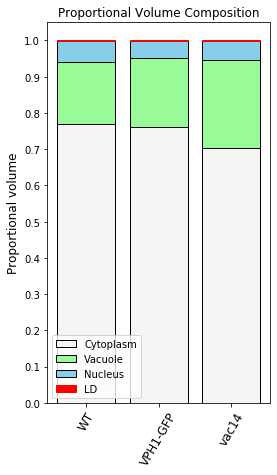

In [246]:
# stack bar plot
vol_comp_stacked = plt.figure(figsize = (4,7))
plt.bar(strains, np.array(cyto_means), color = 'whitesmoke', edgecolor = 'black')
plt.bar(strains, np.array(vac_means), bottom =  np.array(cyto_means), color = 'palegreen', edgecolor = 'black')
plt.bar(strains, np.array(nuc_means), bottom =  np.array(cyto_means)+ np.array(vac_means), color = 'skyblue', edgecolor = 'black')
plt.bar(strains, np.array(ld_means), bottom =  np.array(cyto_means)+ np.array(vac_means)+np.array(nuc_means), color = 'r', edgecolor = 'r')

plt.legend(['Cytoplasm','Vacuole','Nucleus','LD'],fontsize=10)
plt.xticks(rotation=60,fontsize=12)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('Proportional volume',fontsize=12)
plt.title('Proportional Volume Composition',fontsize=12)


plt.savefig(output_dir +'stacked vol composition prop_strains2.jpg')

### Fig 4FG ###

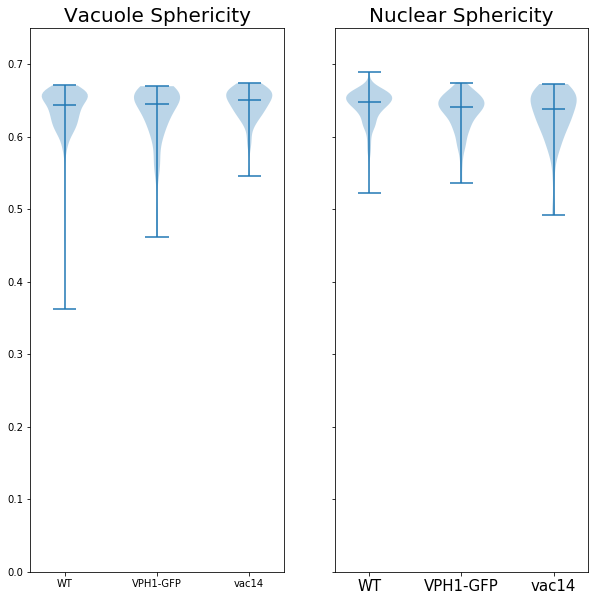

In [277]:
fig,axs = plt.subplots(1,2,squeeze=False,sharex=True,sharey=True,figsize=(10,10))
grps = ['WT','VPH1-GFP', 'vac14']
plt.xticks(ticks=[1,2,3],labels=grps,fontsize=15)
plt.ylim([0,0.75])

vac_sphr = [wt_vac['Sphericity(Pix)'],vph1_vac['Sphericity(Pix)'],vac14_vac['Sphericity(Pix)']]
axs[0,0].violinplot(vac_sphr,showmedians=True)
axs[0,0].set_title('Vacuole Sphericity',fontsize=20)
# axs[0,1].set_ylabel('Vacuole Sphericity',fontsize=15)

nuc_sphr = [wt_nuc['Sphericity(Pix)'],vph1_nuc['Sphericity(Pix)'], vac14_nuc['Sphericity(Pix)']]
axs[0,1].violinplot(nuc_sphr,showmedians=True)
# axs[0,0].set_ylabel('Nuclear Sphericity',fontsize=15)
axs[0,1].set_title('Nuclear Sphericity',fontsize=20)

plt.savefig(output_dir + 'Vac Nuc Sphericity')

In [212]:
# sphericity stats
Excelwriter = pd.ExcelWriter("Sphericity summary stats.xlsx", engine = 'xlsxwriter')

vac_sphr_stats = calcstats(vac_sphr)
# vac_sphr_stats.to_excel(Excelwriter, sheet_name = 'Vacuole', index=False)

nuc_sphr_stats = calcstats(nuc_sphr)
# nuc_sphr_stats.to_excel(Excelwriter, sheet_name = 'Nucleus', index=False)

nuc_sphr_stats
# Excelwriter.save()



,Sphericity(Pix),Sphericity(Pix),Sphericity(Pix)
count,287,138,65
mean,0.641899,0.633826,0.630169
std,0.0229496,0.0267055,0.0371095
min,0.522,0.536,0.492
25%,0.6325,0.62075,0.618
50%,0.648,0.6415,0.639
75%,0.658,0.651,0.657
max,0.689,0.675,0.673
Shapiro-Wilk statistic,0.876563,0.902642,0.84194
Shapiro-Wilk p-value,1.91938e-14,5.25019e-08,8.06393e-07


In [213]:
# sphericity significance testing

sphr_tests = {'Vacuole - WT vs vph1-GFP':(vac_sphr[0], vac_sphr[1]), 'Vacuole - vph1-GFP vs vac14':(vac_sphr[1],vac_sphr[2]),
            'Nucleus - WT vs vph1-GFP':(nuc_sphr[0], nuc_sphr[1]), 'Nucleus - vph1-GFP vs vac14':(nuc_sphr[1],nuc_sphr[2])}

sphr_sigstats = sigtest(sphr_tests)
sphr_sigstats

# sphr_sigstats.to_excel(Excelwriter, sheet_name = 'Significance Tests', index=False)
# Excelwriter.save()


,Vacuole - WT vs vph1-GFP,Vacuole - vph1-GFP vs vac14,Nucleus - WT vs vph1-GFP,Nucleus - vph1-GFP vs vac14
Mann-Whitney U-test statistic,19675,3679.5,15809.5,4450.5
p-value,0.457176,0.0196018,0.000378393,0.465302
Significant (p<0.05),NS,S,S,NS


Text(0.5, 1.0, 'Vacuole Sphericity')

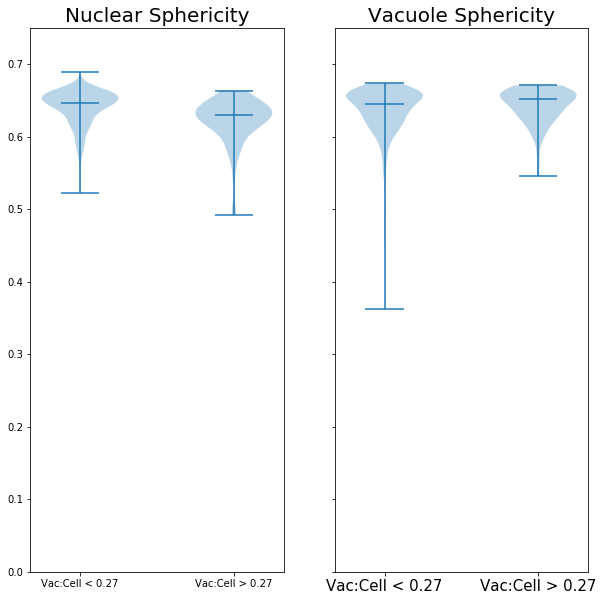

In [262]:
fig,axs = plt.subplots(1,2,squeeze=False,sharex=True, sharey=True,figsize=(10,10))

grps = ['Vac:Cell < 0.27','Vac:Cell > 0.27']
plt.xticks(ticks=[1,2],labels=grps,fontsize=15)
plt.ylim([0,0.75])


nuc_sphr = [normalVC_nuc['Sphericity(Pix)'],highVC_nuc['Sphericity(Pix)']]
axs[0,0].violinplot(nuc_sphr,showmedians=True)
# axs[0,0].set_ylabel('Nuclear Sphericity',fontsize=15)
axs[0,0].set_title('Nuclear Sphericity',fontsize=20)

vac_sphr = [normalVC_vac['Sphericity(Pix)'],highVC_vac['Sphericity(Pix)']]
axs[0,1].violinplot(vac_sphr,showmedians=True)
axs[0,1].set_title('Vacuole Sphericity',fontsize=20)
# axs[0,1].set_ylabel('Vacuole Sphericity',fontsize=15)


plt.savefig(output_dir + '5e_Nspher_Vspher_violins_vc')

## 5f. Nuclear sphericity vs Vacuole sphericity

### 5f.vs.log 

ValueError: x and y must be the same size

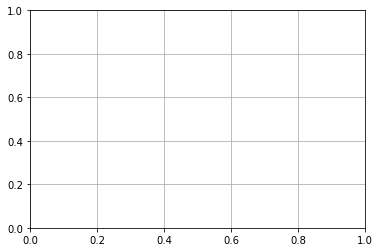

In [251]:
NucVac_scaling = plt.figure()

x_n = normalVC_vac['Sphericity(Pix)']
y_n = normalVC_nuc['Sphericity(Pix)']
x_h = highVC_vac['Sphericity(Pix)']
y_h = highVC_nuc['Sphericity(Pix)']

plt.grid(visible=True)

# log-log plot
logx_n = np.log(x_n)
logy_n = np.log(y_n)

plt.scatter(logx_n,logy_n,s=15,color='lightgray',alpha=0.4,edgecolor='k')
plt.ylabel('log Nucleus Sphericity')
plt.xlabel('log Vacuole Sphericity')
r2 = (np.corrcoef(logx_n,logy_n))*(np.corrcoef(logx_n,logy_n))
b,a = np.polyfit(logx_n,logy_n,deg=1)
xseq = np.linspace(-1,5)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
plt.text(6.5,0.5,'normal V:C',c='k')
plt.text(6.5,0.25,'slope = ' + str(round(b,4)),c='k')
plt.text(6.5,0,'R^2 = ' + str(round(r2[0][1],3)),c='k')

logx_h = np.log(x_h)
logy_h = np.log(y_h)

plt.scatter(logx_h,logy_h,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')
plt.ylabel('log Nucleus Sphericity')
plt.xlabel('log Vacuole Sphericity')
r2 = (np.corrcoef(logx_h,logy_h))*(np.corrcoef(logx_h,logy_h))
b,a = np.polyfit(logx_h,logy_h,deg=1)
xseq = np.linspace(-1,5)
plt.plot(xseq,a+b*xseq,color='g',lw=1)
plt.text(6.5,-0.25,'high V:C',c='g')
plt.text(6.5,-0.5,'slope = ' + str(round(b,4)),c='g')
plt.text(6.5,-0.75,'R^2 = ' + str(round(r2[0][1],3)),c='g')

# NucVac_scaling.savefig(output_dir +'4a_vc_log')

### 5f.vc.lin

# Organelle shape-size relationships
### is  volume correlated w sphericity (does shape reflect biophys properties like surface tension associated w size?

## Nucleus 

### Sphericity vs Volume

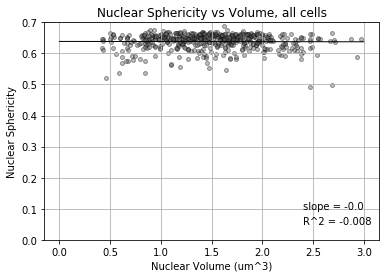

In [163]:
# All cells

plt.grid(visible=True)
plt.ylim([0,0.7])


x = all_nuc['Volume (um^3)']
y = all_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
# plt.text(2.2,0.10,'WT',c='k')
plt.text(2.4,0.10,'slope = ' + str(round(b,3)),c='k')
plt.text(2.4,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('Nuclear Volume (um^3)')
plt.title("Nuclear Sphericity vs Volume, all cells")

plt.savefig(output_dir +'Nuc sphericity vs vol_all')
# doesn't look like it; add regression

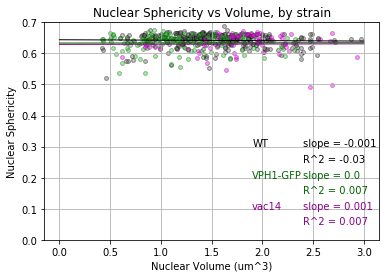

In [121]:
# by strain

plt.grid(visible=True)
plt.ylim([0,0.7])

x = wt_nuc['Volume (um^3)']
y = wt_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.9,0.30,'WT',c='k')
plt.text(2.4,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(2.4,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = vph1_nuc['Volume (um^3)']
y = vph1_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.9,.20,'VPH1-GFP',c='darkgreen')
plt.text(2.4,0.20,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(2.4,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

x = vac14_nuc['Volume (um^3)']
y = vac14_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='magenta',alpha=0.4,edgecolor='darkmagenta')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='darkmagenta',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.9,0.10,'vac14',c='darkmagenta')
plt.text(2.4,0.10,'slope = ' + str(round(b,3)),c='darkmagenta')
plt.text(2.4,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkmagenta')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('Nuclear Volume (um^3)')
plt.title("Nuclear Sphericity vs Volume, by strain")

plt.savefig(output_dir +'Nuc sphericity vs vol_strain')


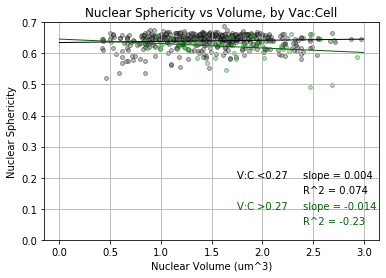

In [127]:
# by V:C

plt.grid(visible=True)
plt.ylim([0,0.7])

x = normalVC_nuc['Volume (um^3)']
y = normalVC_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.75,0.20,'V:C <0.27',c='k')
plt.text(2.4,0.20,'slope = ' + str(round(b,3)),c='k')
plt.text(2.4,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = highVC_nuc['Volume (um^3)']
y = highVC_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,3)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.75,.10,'V:C >0.27',c='darkgreen')
plt.text(2.4,0.10,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(2.4,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('Nuclear Volume (um^3)')
plt.title("Nuclear Sphericity vs Volume, by Vac:Cell")

plt.savefig(output_dir +'Nuc sphericity vs vol_byVC')


### Sphericity vs V:Cyto

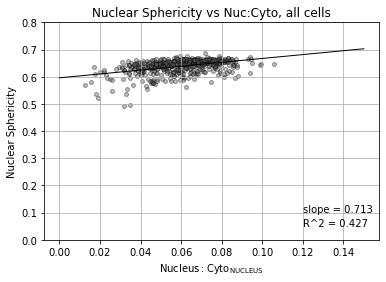

In [150]:
# All cells

plt.grid(visible=True)
plt.ylim([0,0.8])

x = all_vol_rat['NCytoratio']
y = all_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
# plt.text(2.2,0.10,'WT',c='k')
plt.text(0.12,0.10,'slope = ' + str(round(b,3)),c='k')
plt.text(0.12,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('$Nucleus:Cyto_{NUCLEUS}$')
plt.title("Nuclear Sphericity vs Nuc:Cyto, all cells")

plt.savefig(output_dir +'Nuc sphericity vs N-cyto_all')


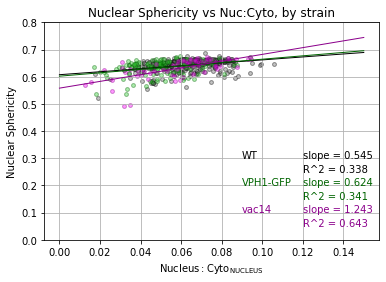

In [156]:
# by strain

plt.grid(visible=True)
plt.ylim([0,0.8])

x = wt_vol_rat['NCytoratio']
y = wt_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.09,0.30,'WT',c='k')
plt.text(0.12,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(0.12,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = vph1gfp_vol_rat['NCytoratio']
y = vph1_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.09,.20,'VPH1-GFP',c='darkgreen')
plt.text(0.12,0.20,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(0.12,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

x = vac14_vol_rat['NCytoratio']
y = vac14_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='magenta',alpha=0.4,edgecolor='darkmagenta')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='darkmagenta',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.09,0.10,'vac14',c='darkmagenta')
plt.text(0.12,0.10,'slope = ' + str(round(b,3)),c='darkmagenta')
plt.text(0.12,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkmagenta')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('$Nucleus:Cyto_{NUCLEUS}$')
plt.title("Nuclear Sphericity vs Nuc:Cyto, by strain")

plt.savefig(output_dir +'Nuc sphericity vs N-cyto_strain')


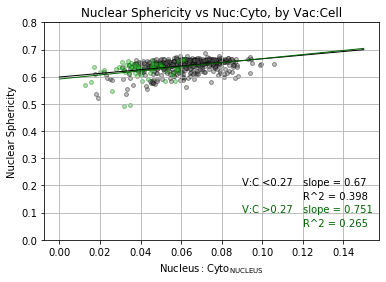

In [160]:
# by V:C

plt.grid(visible=True)
plt.ylim([0,0.8])

x = normalVC_vol_rat['NCytoratio']
y = normalVC_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.09,0.20,'V:C <0.27',c='k')
plt.text(0.12,0.20,'slope = ' + str(round(b,3)),c='k')
plt.text(0.12,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = highVC_vol_rat['NCytoratio']
y = highVC_nuc['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.15)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.09,0.10,'V:C >0.27',c='darkgreen')
plt.text(0.12,0.1,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(0.12,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

plt.ylabel('Nuclear Sphericity')
plt.xlabel('$Nucleus:Cyto_{NUCLEUS}$')
plt.title("Nuclear Sphericity vs Nuc:Cyto, by Vac:Cell")

plt.savefig(output_dir +'Nuc sphericity vs N-cyto_byVC')


## Vacuole

### Sphericity vs Volume

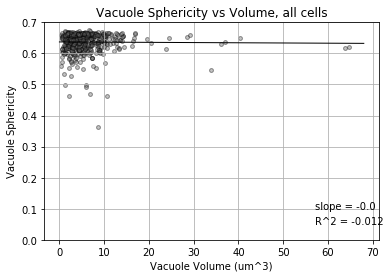

In [162]:
# All cells

plt.grid(visible=True)
plt.ylim([0,0.7])


x = all_vac['Volume (um^3)']
y = all_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
# plt.text(2.2,0.10,'WT',c='k')
plt.text(57,0.10,'slope = ' + str(round(b,3)),c='k')
plt.text(57,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.ylabel('Vacuole Sphericity')
plt.xlabel('Vacuole Volume (um^3)')
plt.title("Vacuole Sphericity vs Volume, all cells")

plt.savefig(output_dir +'Vac sphericity vs vol_all')

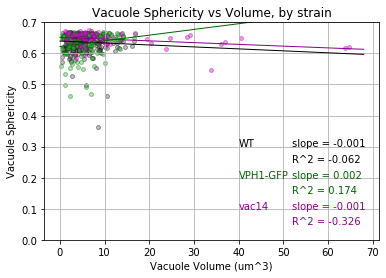

In [137]:
# by strain

plt.grid(visible=True)
plt.ylim([0,0.7])

x = wt_vac['Volume (um^3)']
y = wt_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(40,0.30,'WT',c='k')
plt.text(52,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(52,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = vph1_vac['Volume (um^3)']
y = vph1_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(40,.20,'VPH1-GFP',c='darkgreen')
plt.text(52,0.20,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(52,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

x = vac14_vac['Volume (um^3)']
y = vac14_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='magenta',alpha=0.4,edgecolor='darkmagenta')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='darkmagenta',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(40,0.10,'vac14',c='darkmagenta')
plt.text(52,0.10,'slope = ' + str(round(b,3)),c='darkmagenta')
plt.text(52,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkmagenta')

plt.ylabel('Vacuole Sphericity')
plt.xlabel('Vacuole Volume (um^3)')
plt.title("Vacuole Sphericity vs Volume, by strain")

plt.savefig(output_dir +'Vac sphericity vs vol_strain')

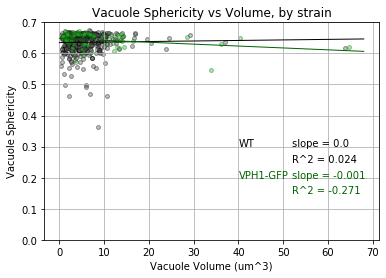

In [136]:
# by V:C

plt.grid(visible=True)
plt.ylim([0,0.7])

x = normalVC_vac['Volume (um^3)']
y = normalVC_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(40,0.30,'WT',c='k')
plt.text(52,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(52,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = highVC_vac['Volume (um^3)']
y = highVC_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,68)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(40,.20,'VPH1-GFP',c='darkgreen')
plt.text(52,0.20,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(52,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')


plt.ylabel('Vacuole Sphericity')
plt.xlabel('Vacuole Volume (um^3)')
plt.title("Vacuole Sphericity vs Volume, by strain")

plt.savefig(output_dir +'Vac sphericity vs vol_byVC')

### Sphericity vs V:Cyto

In [269]:
# create matching lists of Vac sphericity (n=492) and V:Cyto ratios (n=490) 
# start with the list of sphericities
# find the associated cell ID, find the same one in the vol_rat dataframe
# use the index of the cellID to find to VCytoratio

allvac_cellIDs = list(all_vac['Cell ID'])   # len 492
allvac_cellIDs = [x.split('_VAC')[0] for x in allvac_cellIDs]
# len(allvac_cellIDs)

all_vac_VCytos = [] # should be 492

i=0
for x in allvac_cellIDs: # for this cell ID in all_metrics (spher), find the same cell ID in volrat, and its corresponding index
    new_cellID = x + '_CELL'
#     print(x,new_cellID)
    matchrow = all_vol_rat.loc[all_vol_rat['Cell ID'] ==new_cellID]
#     print(matchrow)
#     print(list(matchrow['VCytoratio'])[0])
    all_vac_VCytos.append(list(matchrow['VCytoratio'])[0])
#     ind = [i for i,c in enumerate(volrat_cellIDs) if c == x] # 492 (104-105, 251-252)
#     ind = ind[0] #490
# #     vcyto = ind[0]
#     print(ind)
    i+=1

len(all_vac_VCytos)

492

In [267]:
# all_vac
all_vol_rat

vac_sphr_VC_df = pd.DataFrame()
vac_sphr_VC_df['Vac ID'] = all_vac['Cell ID']
vac_sphr_VC_df['Sphericity'] = all_vac['Sphericity(Pix)']
vac_sphr_VC_df['VCyto_ratio'] = all_vac_VCytos
vac_sphr_VC_df

,Vac ID,Sphericity,VCyto_ratio
0,BY471A_1026_1_10_pre_rec_0_multi_bin_VAC,0.637,0.130068
1,BY471A_1026_1_10_pre_rec_10_multi_bin_VAC,0.607,0.196252
2,BY471A_1026_1_10_pre_rec_13_multi_bin_VAC,0.650,0.337774
3,BY471A_1026_1_10_pre_rec_15_multi_bin_VAC,0.586,0.176611
4,BY471A_1026_1_10_pre_rec_19_multi_bin_VAC,0.657,0.148962
...,...,...,...
487,wt_BY4741A_1463_6_pre_rec_7_multi_bin_VAC,0.660,0.156288
488,wt_BY4741A_1463_6_pre_rec_8_multi_bin_VAC,0.610,0.144626
489,wt_BY4741A_1463_7_pre_rec_0_multi_bin_VAC,0.667,0.240712
490,wt_BY4741A_1463_7_pre_rec_1_multi_bin_VAC,0.663,0.202330


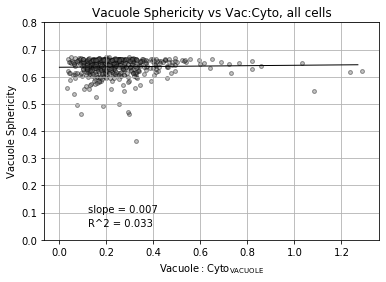

In [397]:
# All cells

plt.grid(visible=True)
plt.ylim([0,0.8])

x = vac_sphr_VC_df['VCyto_ratio']
y = vac_sphr_VC_df['Sphericity']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
# plt.text(2.2,0.10,'WT',c='k')
plt.text(0.12,0.10,'slope = ' + str(round(b,3)),c='k')
plt.text(0.12,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.ylabel('Vacuole Sphericity')
plt.xlabel('$Vacuole:Cyto_{VACUOLE}$')
plt.title("Vacuole Sphericity vs Vac:Cyto, all cells")

plt.savefig(output_dir +'Vac sphericity vs V-cyto_all')

In [399]:
# by strain

vac_VCytos_dict = {} 

vac_lists = {'WT':[wt_vac,wt_vol_rat], 'vph1gfp':[vph1_vac,vph1gfp_vol_rat], 'vac14':[vac14_vac,vac14_vol_rat]}
strains = ['WT','vph1gfp','vac14']

for s in strains:
    vac_metrics = vac_lists[s][0]
    vol_rat = vac_lists[s][1]

    cellIDs = list(vac_metrics['Cell ID'])
    cellIDs = [x.split('_VAC')[0] for x in cellIDs]
    vac_VCytos = []

    for x in cellIDs: # for this cell ID in all_metrics (spher), find the same cell ID in volrat, and its corresponding index
        new_cellID = x + '_CELL'
    #     print(x,new_cellID)
        matchrow = vol_rat.loc[vol_rat['Cell ID'] ==new_cellID]
#         print(matchrow)
#         print(list(matchrow['VCytoratio'])[0])
        vac_VCytos.append(list(matchrow['VCytoratio'])[0])
    #     ind = [i for i,c in enumerate(volrat_cellIDs) if c == x] # 492 (104-105, 251-252)
    #     ind = ind[0] #490
    # #     vcyto = ind[0]
#     print(vac_VCytos)
    vac_VCytos_dict.update({s:vac_VCytos})

vac_VCytos_dict

{'WT': [0.1300680162998532,
  0.1962522441651705,
  0.3377742584172129,
  0.1766113249357115,
  0.1489617077894789,
  0.1589370926804289,
  0.1349745939545824,
  0.1399168245782983,
  0.3384640971269386,
  0.4903124409667383,
  0.2483109234022699,
  0.3834715800532207,
  0.1296787933178852,
  0.2068029225048549,
  0.4921875717913296,
  0.04632574880463441,
  0.2316244701976339,
  0.1805488298977727,
  0.2326997889683722,
  0.1685532661505328,
  0.3580863326769553,
  0.1430818311434486,
  0.1898122757673088,
  0.4807447351674929,
  0.1113056158053134,
  0.2753957202801801,
  0.3287530403324546,
  0.04412641014540732,
  0.3391916936082643,
  0.1985986817727574,
  0.2859512159586222,
  0.2106826556882365,
  0.06816140461286911,
  0.09268940300781335,
  0.1526462472788785,
  0.2622259291197218,
  0.1692941658773802,
  0.2942335542032571,
  0.2029808186057705,
  0.1638240913128658,
  0.116456810724211,
  0.1741956812883943,
  0.4240258682914144,
  0.1944783345820497,
  0.1119478714099182,
 

In [400]:
len(wt_vac['Sphericity(Pix)'])
len(vac_VCytos_dict['WT'])

288

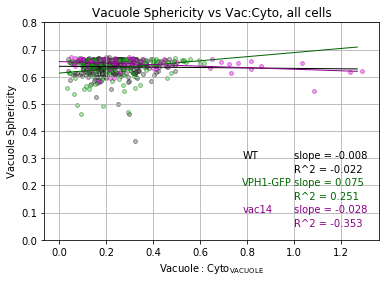

In [401]:
# by strain 
plt.grid(visible=True)
plt.ylim([0,0.8])

x = vac_VCytos_dict['WT']
y = wt_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.78,0.30,'WT',c='k')
plt.text(1,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(1,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = vac_VCytos_dict['vph1gfp']
y = vph1_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.78,0.2,'VPH1-GFP',c='darkgreen')
plt.text(1,0.2,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(1,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')

x = vac_VCytos_dict['vac14']
y = vac14_vac['Sphericity(Pix)']
plt.scatter(x,y,s=15,color='magenta',alpha=0.4,edgecolor='darkmagenta')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='darkmagenta',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.78,0.1,'vac14',c='darkmagenta')
plt.text(1.0,0.1,'slope = ' + str(round(b,3)),c='darkmagenta')
plt.text(1.0,0.05,'R^2 = ' + str(round(r2[0][1],3)),c='darkmagenta')


plt.ylabel('Vacuole Sphericity')
plt.xlabel('$Vacuole:Cyto_{VACUOLE}$')
plt.title("Vacuole Sphericity vs Vac:Cyto, all cells")

plt.savefig(output_dir +'Vac sphericity vs V-cyto_strain')

In [395]:
vac_sphr_VC_df

norm = vac_sphr_VC_df[vac_sphr_VC_df['VCyto_ratio']<0.27]
high = vac_sphr_VC_df[vac_sphr_VC_df['VCyto_ratio']>=0.27]

norm

,Vac ID,Sphericity,VCyto_ratio
0,BY471A_1026_1_10_pre_rec_0_multi_bin_VAC,0.637,0.130068
1,BY471A_1026_1_10_pre_rec_10_multi_bin_VAC,0.607,0.196252
3,BY471A_1026_1_10_pre_rec_15_multi_bin_VAC,0.586,0.176611
4,BY471A_1026_1_10_pre_rec_19_multi_bin_VAC,0.657,0.148962
5,BY471A_1026_1_10_pre_rec_1_multi_bin_VAC,0.644,0.158937
...,...,...,...
487,wt_BY4741A_1463_6_pre_rec_7_multi_bin_VAC,0.660,0.156288
488,wt_BY4741A_1463_6_pre_rec_8_multi_bin_VAC,0.610,0.144626
489,wt_BY4741A_1463_7_pre_rec_0_multi_bin_VAC,0.667,0.240712
490,wt_BY4741A_1463_7_pre_rec_1_multi_bin_VAC,0.663,0.202330


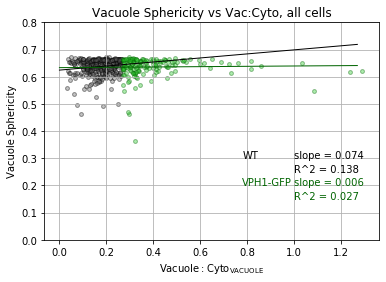

In [402]:
# by strain 
plt.grid(visible=True)
plt.ylim([0,0.8])

x = norm['VCyto_ratio']
y = norm['Sphericity']
plt.scatter(x,y,s=15,color='dimgray',alpha=0.4,edgecolor='k')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.78,0.30,'WT',c='k')
plt.text(1,0.30,'slope = ' + str(round(b,3)),c='k')
plt.text(1,0.25,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x = high['VCyto_ratio']
y = high['Sphericity']
plt.scatter(x,y,s=15,color='limegreen',alpha=0.4,edgecolor='darkgreen')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.27)
plt.plot(xseq,a+b*xseq,color='darkgreen',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.78,0.2,'VPH1-GFP',c='darkgreen')
plt.text(1,0.2,'slope = ' + str(round(b,3)),c='darkgreen')
plt.text(1,0.15,'R^2 = ' + str(round(r2[0][1],3)),c='darkgreen')


plt.ylabel('Vacuole Sphericity')
plt.xlabel('$Vacuole:Cyto_{VACUOLE}$')
plt.title("Vacuole Sphericity vs Vac:Cyto, all cells")

plt.savefig(output_dir +'Vac sphericity vs V-cyto_byVC')

# General Plotting #

## Univariate ##

Text(0.5, 0, 'Volume (um^3)')

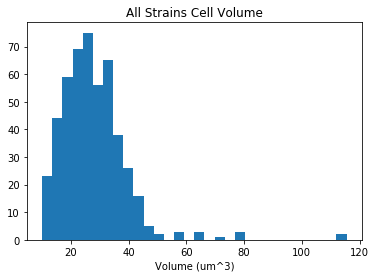

In [16]:
# export histograms

# Nucleus
# WTnuc_vol_hist = plt.hist(nuc_filt[0]['Volume (um^3)'], bins = 30,label='All Nuc')
# plt.title('All Strains Nucleus Volume')
# plt.xlabel('Volume (um^3)')

# # # output figures directory
# # os.getcwd()

# figs_dir = 'C:\\Users\\Mary\\Documents\\Shared folder\\Data\\SXT\\ML segmentation tiffs\\Final set for analysis\\3D Suite Measurements\\Figures\\'
# plt.savefig(figs_dir + 'all_nuc_vol_hist_bins30.png',format = 'png')

# Cell
WTcell_vol_hist = plt.hist(cell_filt[0]['Volume (um^3)'],bins = 30,label='All Cell')
plt.title('All Strains Cell Volume')
plt.xlabel('Volume (um^3)')

# # output figures directory
# # os.getcwd()

# figs_dir = 'C:\\Users\\Mary\\Documents\\Shared folder\\Data\\SXT\\ML segmentation tiffs\\Final set for analysis\\3D Suite Measurements\\Figures\\'
# plt.savefig(figs_dir + 'all_cell_vol_hist_bins30.png',format = 'png')

# LD
# WT_LD_vol_hist = plt.hist(LD_WT['Volume (um^3)'],bins = 40, label='WT LD')
# plt.title('WT LD Volume')
# plt.xlabel('Volume (um^3)')

# output figures directory
# os.getcwd()

# figs_dir = 'C:\\Users\\Mary\\Documents\\Shared folder\\Data\\SXT\\ML segmentation tiffs\\Final set for analysis\\3D Suite Measurements\\Figures\\'
# plt.savefig(figs_dir + 'WT_LD_vol_hist_bin40.png',format = 'png')

Text(0.5, 1.0, 'Nucleus Volume (all strains)')

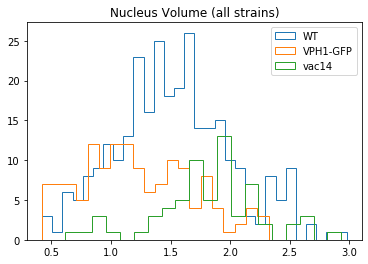

In [17]:
# overlay histograms of 3 strains

# Cell
# plt.hist(cell_filt[1]['Volume (um^3)'], bins = 20, label = 'WT', histtype = 'step')
# plt.hist(cell_filt[2]['Volume (um^3)'], bins = 20, label = 'VPH1-GFP', histtype = 'step')
# plt.hist(cell_filt[3]['Volume (um^3)'], bins = 20, label = 'vac14', histtype = 'step')
# plt.legend()
# plt.title('Cell Volume (all strains)')

# plt.savefig(figs_dir + 'Cell_Vol_strains_overlay.png',format = 'png')

# Vacuole
# plt.hist(vac_filt[1]['Volume (um^3)'], bins = 20, label = 'WT', histtype = 'step')
# plt.hist(vac_filt[2]['Volume (um^3)'], bins = 20, label = 'VPH1-GFP', histtype = 'step')
# plt.hist(vac_filt[3]['Volume (um^3)'], bins = 20, label = 'vac14', histtype = 'step')
# plt.legend()
# plt.title('Vacuole Volume (all strains)')

# plt.savefig(figs_dir + 'Vac_Vol_strains_overlay.png',format = 'png')

# Nucleus
plt.hist(nuc_filt[1]['Volume (um^3)'], bins = 30, label = 'WT', histtype = 'step')
plt.hist(nuc_filt[2]['Volume (um^3)'], bins = 20, label = 'VPH1-GFP', histtype = 'step')
plt.hist(nuc_filt[3]['Volume (um^3)'], bins = 20, label = 'vac14', histtype = 'step')
plt.legend()
plt.title('Nucleus Volume (all strains)')

# plt.savefig(figs_dir + 'Nuc_Vol_strains_overlay.png',format = 'png')

# # LD
# plt.hist(LD_WT['Volume (um^3)'], bins = 20, label = 'WT', histtype = 'step')
# plt.hist(LD_vph1GFP['Volume (um^3)'], bins = 20, label = 'VPH1-GFP', histtype = 'step')
# plt.hist(LD_vac14['Volume (um^3)'], bins = 20, label = 'vac14', histtype = 'step')
# plt.legend()
# plt.title('LD Volume (all strains)')

# plt.savefig(figs_dir + 'LD_Vol_strains_overlay.png',format = 'png')

C:\Users\Mary\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Mary\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


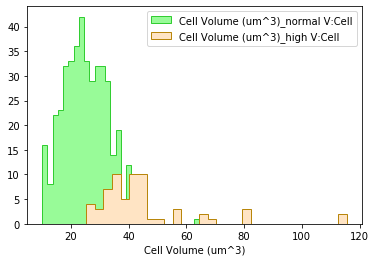

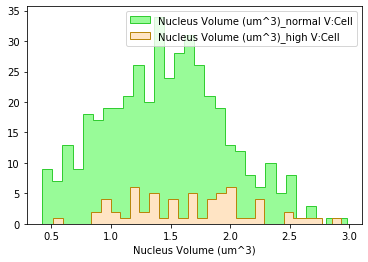

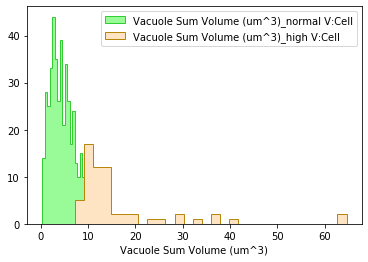

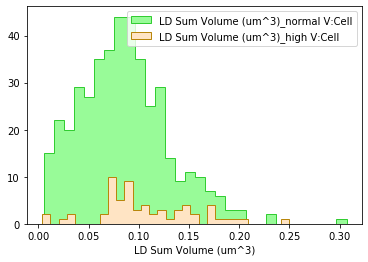

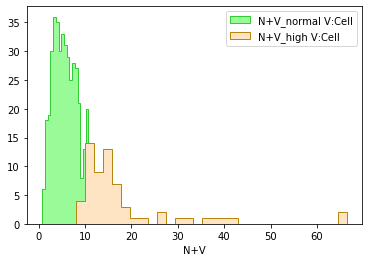

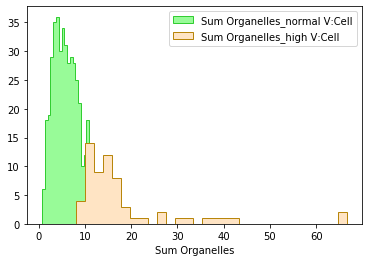

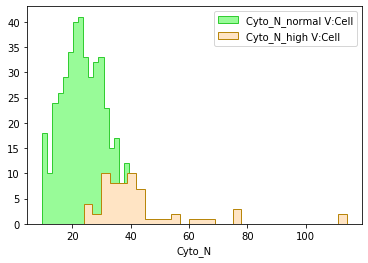

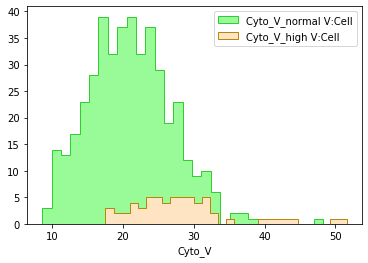

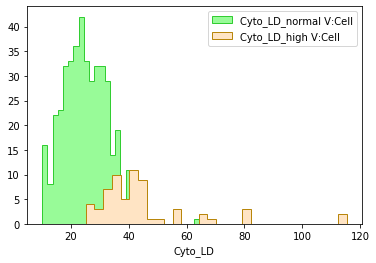

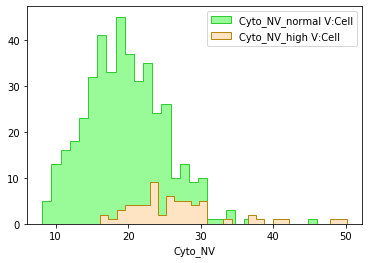

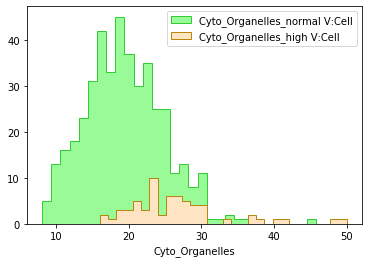

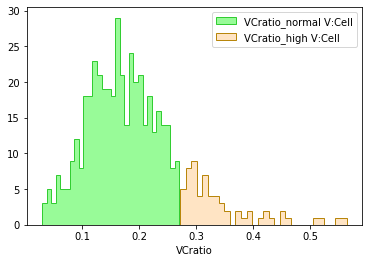

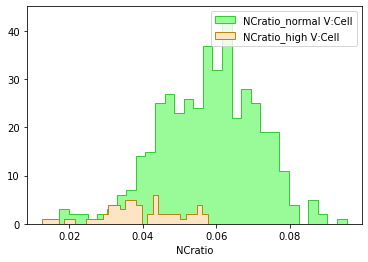

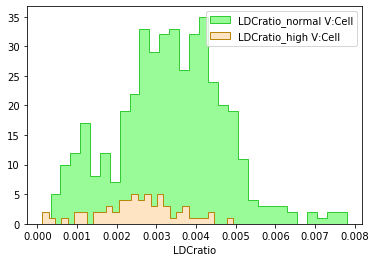

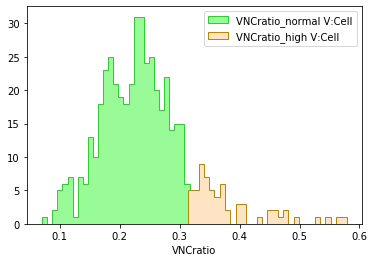

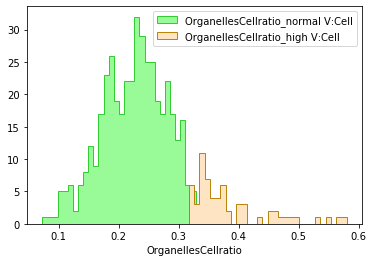

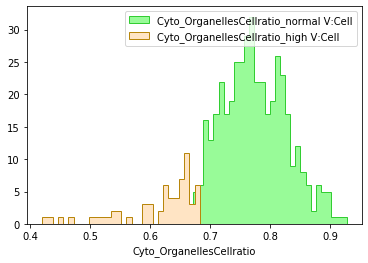

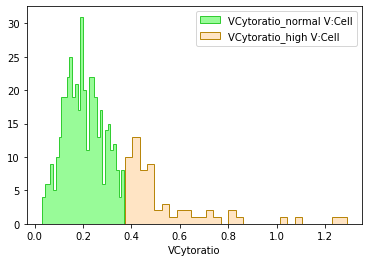

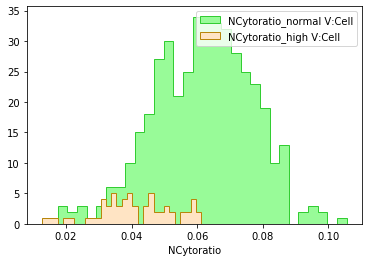

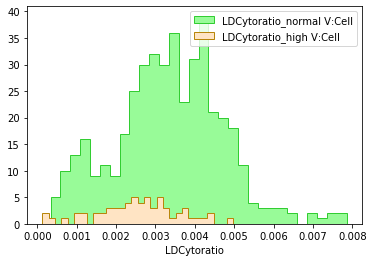

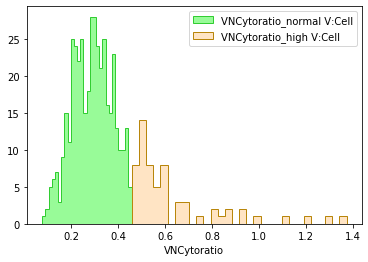

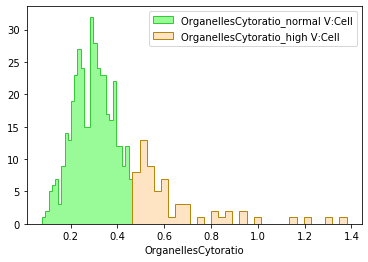

In [18]:
# generate and save histograms and boxplots for every column

# list(all_vols_df)[1:]
figs_dir = 'C:\\Users\\Mary\\Documents\\Shared folder\\Data\\SXT\\ML segmentation tiffs\\Final set for analysis\\3D Suite Measurements\\Figures\\Histograms filtered\\by VC\\VC overlay\\'

for x in list(normal_VC_vols_df)[1:]:
#     print(x, all_vols_df[x])
#     print(all_vols_df[x].describe())
#     plt.subplots()
#     plt.hist(WT_vols_df[x], bins = 30, histtype = 'stepfilled', color = 'bisque', edgecolor = "darkgoldenrod", label= x + "_WT")
#     plt.hist(vph1GFP_vols_df[x], bins = 30, histtype = 'stepfilled', color = 'palegreen', edgecolor = "limegreen", label= x + "_VPH1-GFP")
#     plt.hist(vac14_vols_df[x], bins = 30, histtype = 'stepfilled', color = 'paleturquoise', edgecolor = "teal", label= x + "_vac14")

#     plt.title('All Strains Vacuole Volume')
#     plt.xlabel(x)
#     plt.title(x)
#     plt.legend()

##     output figures directory
#     os.getcwd()

#     plt.savefig(figs_dir + x + '_hist_bin30.png',format = 'png')
    
#     print(x, len(normal_VC_vols_df[x]))
    plt.subplots()
    plt.hist(normal_VC_vols_df[x], bins = 30, histtype = 'stepfilled', color = 'palegreen', edgecolor = "limegreen", label= x + "_normal V:Cell")
    plt.hist(high_VC_vols_df[x], bins = 30, histtype = 'stepfilled', color = 'bisque', edgecolor = "darkgoldenrod", label= x + "_high V:Cell")
    plt.xlabel(x)
    plt.legend()
#     plt.title(x + "(Normal V:Cell)")

#     plt.savefig(figs_dir + x + '_hist_bin30.png',format = 'png')

#     x_strains = [WT_vols_df[x],vph1GFP_vols_df[x],vac14_vols_df[x]]
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.boxplot(x_strains, widths = 0.5, showmeans = True)
#     plt.title(x)
#     plt.ylim(ymin=0)

#     ax.set_xticklabels(['WT', 'VPH1-GFP', 'vac14'])
#     fig.savefig(figs_dir + x + '_b&w.tif',bbox_inches = 'tight')
    #bp
    
#     VC_groups = [normal_VC_vols_df[x],high_VC_vols_df[x]]
#     fig = plt.figure()
#     ax = fig.add_axes([0,0,1,1])
#     ax.boxplot(VC_groups, widths = 0.5, showmeans = True)
#     plt.title(x)
#     plt.ylim(ymin=0)
#     plt.ylabel('um^3')

#     ax.set_xticklabels(['V:Cell <0.27', 'V:Cell >0.27'])
#     fig.savefig(figs_dir + x + '_b&w.jpg',bbox_inches = 'tight')
#     bp



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC1B1771C8>,
      dtype=object)

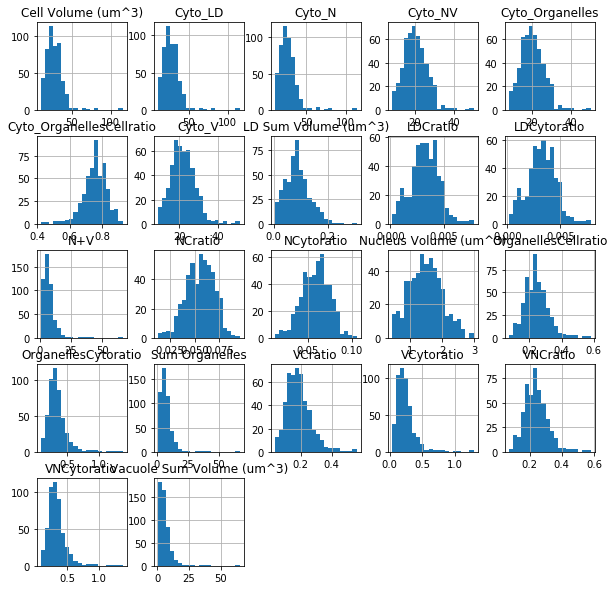

In [19]:
# quicker way to do this? gallery of histograms; boxplots on 1 figure

# all_vols_df.boxplot()
all_vols_df.hist(figsize=(10,10),bins=20 )
# plt.savefig(figs_dir + 'all_vols_hist_b20_gallery.png',format = 'png')

In [23]:
# all nuclear sphericity
nuc_spher_all = nuc_filt[0]['Sphericity(Pix)']
nuc_spher_all.describe()

# plt.hist(nuc_spher, bins = 30, label = 'WT', histtype = 'step')
# plt.hist(nuc_filt[1]['Sphericity(Pix)'], bins = 30, label = 'WT', histtype = 'stepfilled', color = 'skyblue',alpha=1)
# plt.hist(nuc_filt[2]['Sphericity(Pix)'], bins = 30, label = 'WT', histtype = 'stepfilled', color = 'forestgreen',alpha=0.7)
# plt.hist(nuc_filt[3]['Sphericity(Pix)'], bins = 30, label = 'WT', histtype = 'stepfilled', color = 'orange', alpha=0.5)


count    490.000000
mean       0.638069
std        0.026647
min        0.492000
25%        0.627000
50%        0.645000
75%        0.657000
max        0.689000
Name: Sphericity(Pix), dtype: float64

In [24]:
# # create metrics dfs by V:C
# all_strucs = [cell_filt[0], vac_filt[0],nuc_filt[0],LD_filt[0]]
# # strucs_normalVC = {'Cell':pd.DataFrame(),'Vacuole'::pd.DataFrame(),'Nucleus':pd.DataFrame(),'LD':pd.DataFrame()}
# # strucs_highVC = {'Cell':pd.DataFrame(),'Vacuole'::pd.DataFrame(),'Nucleus':pd.DataFrame(),'LD':pd.DataFrame()}

# # def sort_VC(df):
# #     high_VC_df = df[df['V:C']>0.27]
# #     normal_VC_df = df[df['V:C']<=0.27]
    
# #     return(high_VC_df,normal_VC_df)

# # sort_VC(cell_filt[0]) # doesn't work bc no V:C here; need to create sphericity list based on sum
    
# # for x in all_strucs:

# # for i,strain_df in enumerate(df_lists):
# #     writer = pd.ExcelWriter(strains[i]+ " 3D Suite_Filtered.xlsx", engine = 'xlsxwriter')

# #     for j,df in enumerate(strain_df):
# # #         print(j)
# #         df.to_excel(writer, sheet_name = structures[j], index = False)
# #     writer.save()


In [25]:
# WT cell volume analysis for 5/26 stats demo

WT_cell_vol = cell_filt_WT['Volume (um^3)']
WT_cell_summary = pd.DataFrame(WT_cell_vol.describe())
WT_cell_summary
# WT_cell_vol_mean = WT_cell_vol.describe()[1]
# WT_cell_vol_std = WT_cell_vol.describe()[2]
# WT_cell_vol_med = WT_cell_vol.describe()[5]
# WT_cell_vol_q1 = WT_cell_vol.describe()[4]
# WT_cell_vol_q3 = WT_cell_vol.describe()[6]

,Volume (um^3)
count,287.000000
mean,26.439570
std,8.915835
min,10.633740
25%,19.802085
50%,25.147080
75%,32.331945
max,64.502940


NameError: name 'WT_cell_vol_mean' is not defined

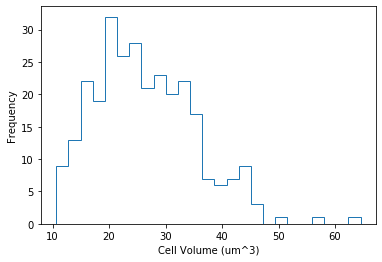

In [26]:
plt.hist(WT_cell_vol, bins = 25, histtype = 'step')
plt.ylabel('Frequency')
plt.xlabel('Cell Volume (um^3)')
plt.axvline(WT_cell_vol_mean, color = 'r')
plt.axvline(WT_cell_vol_mean+WT_cell_vol_std,color = 'r', linestyle = '--')
plt.axvline(WT_cell_vol_mean-WT_cell_vol_std,color = 'r', linestyle = '--')
plt.axvline(WT_cell_vol_med,color='g')
plt.axvline(WT_cell_vol_q1,color='g', linestyle = '--')
plt.axvline(WT_cell_vol_q3,color='g', linestyle = '--')


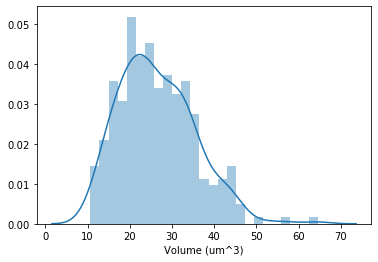

In [27]:
sns.distplot(WT_cell_vol, bins = 25)

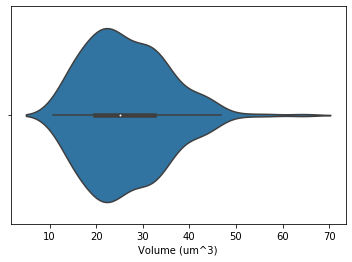

In [28]:
sns.violinplot(WT_cell_vol)
# plt.ylim([0,70])

(0, 70)

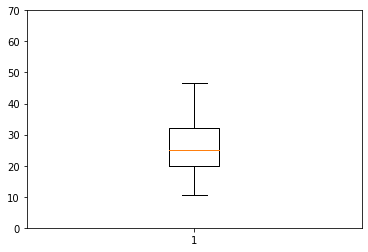

In [29]:
plt.boxplot(WT_cell_vol[WT_cell_vol<50])
plt.ylim([0,70])

In [30]:
stats.skew(WT_cell_vol)
stats.skewtest(WT_cell_vol)

SkewtestResult(statistic=4.398941578286659, pvalue=1.0878010247637525e-05)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1d1667e50c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d1661eb348>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d1667e5fc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d1667e5f48>}

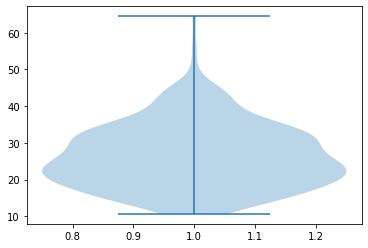

In [29]:
plt.violinplot(WT_cell_vol)

(array([ 1., 10.,  8., 13., 23., 20., 13.,  6.,  4.,  2.]),
 array([23.68911379, 24.27316574, 24.85721769, 25.44126963, 26.02532158,
        26.60937353, 27.19342547, 27.77747742, 28.36152937, 28.94558131,
        29.52963326]),
 <a list of 10 Patch objects>)

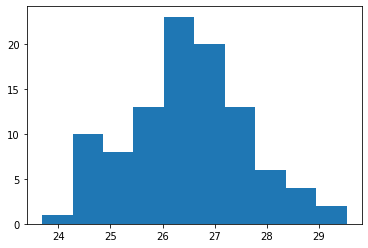

In [164]:
#testing CLT - resampling data and plotting histogram of means

i=0
samplemeans = []
while i< 100:
    smpl = WT_cell_vol.sample(n=50)
    print(smpl.mean())
    samplemeans.append(smpl.mean())
    i+=1

plt.hist(samplemeans)
stats.skew(samplemeans)
stats.skewtest(samplemeans)

## Plotting - bivariate scaling plots ##

(array([ 1.,  2.,  1.,  1.,  1.,  8., 12., 11., 14., 11.]),
 array([-4.36190103, -4.2049436 , -4.04798617, -3.89102874, -3.73407131,
        -3.57711388, -3.42015645, -3.26319902, -3.10624159, -2.94928416,
        -2.79232673]),
 <a list of 10 Patch objects>)

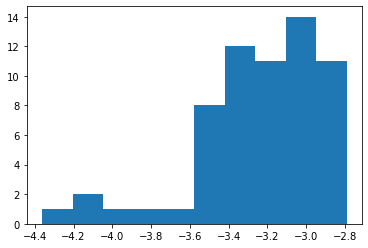

Text(90, -20, 'R^2 = 0.763')

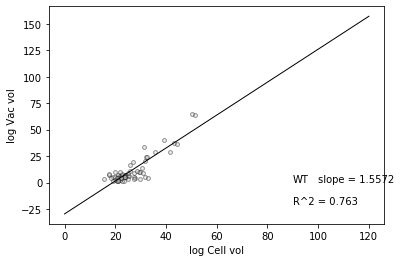

In [267]:
# power law fit

# log-log plot
logx = np.log(x1)
logy = np.log(y1)


plt.scatter(x,y,s=15,color='lightgray',alpha=0.4,edgecolor='k')
plt.ylabel('log Vac vol')
plt.xlabel('log Cell vol')
r2 = (np.corrcoef(x,y))*(np.corrcoef(x,y))
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,120)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
plt.text(90,0.,'WT',c='k')
plt.text(100,0,'slope = ' + str(round(b,4)),c='k')
plt.text(90,-20,'R^2 = ' + str(round(r2[0][1],3)),c='k')

In [548]:
# vacuole sphericity
# need to remove extras and add Sphericity to vols_df

x = WT_vols_df['V:C']
y = vac_filt_WT['Sphericity(Pix)']
# plt.scatter(x,y)


KeyError: 'V:C'

In [179]:
# J&I 6/2 bivariate data analysis exercise

# cell sphericity vs cell volume

# cell_filt_WT
x = cell_filt_WT['Volume (um^3)']
y = cell_filt_WT['Sphericity(Pix)']

# plt.scatter(x,y)
# plt.ylabel('Cell Sphericity')
# plt.xlabel('Cell Volume (um^3)')

stats.skew(cell_filt_WT['Sphericity(Pix)'])
# stats.skew(y)

# plt.hist(x)
# plt.hist(y)

-1.1009101299023922

In [129]:
# calculate  p value of correlation ; https://stackoverflow.com/questions/52741236/how-to-calculate-p-values-for-pairwise-correlation-of-columns-in-pandas

from scipy.stats import kendalltau, pearsonr, spearmanr

# def kendall_pval(x,y):
#     return kendalltau(x,y)[1]
    
# def pearsonr_pval(x,y):
#     return pearsonr(x,y)[1]
    
# def spearmanr_pval(x,y):
#     return spearmanr(x,y)[1]

pearsonr(x,y)

(0.8965462706169891, 9.57863978022626e-153)

In [128]:
# covariance matrix of x (cell vol) and y (sum vac vol)
np.cov(x,y)

df.cov

# calculate covariance manually
# xlist = x.tolist()
# ylist = y.tolist()
# cov_num = []
# for i in range(len(xlist)):
# #     print(i)
# #     print(i-x.mean())
# #     for vv in y:
# #         vv-y.mean()
#     cov_num.append((xlist[i]-x.mean())*(ylist[i]-y.mean()))
# #     print((xlist[i]-x.mean())*(ylist[i]-y.mean()))
    

# cov_xy = sum(cov_num)/(len(xlist)-1)
# cov_xy

# # correlation matrix of x and y
# np.corrcoef(x,y)
# x.corr(method='pearson',min_periods=1)

# # calculate correlation manually
# corr_xy = cov_xy/((math.sqrt(np.var(x)))*(math.sqrt(np.var(y))))
# # print(math.sqrt(np.var(x)))
# # print(np.var(y))
# corr_xy

TypeError: corr() missing 1 required positional argument: 'other'

In [158]:
# np.cov(x,y)
np.corrcoef(x,y)
spearmanr(x,y)

array([[1.        , 0.99394132],
       [0.99394132, 1.        ]])

In [241]:
logx = np.log(x)
logy = np.log(y)
logx
# plt.scatter(logx,logy)
# plt.ylabel('Cell Sphericity')
# plt.xlabel('Cell Volume (um^3)')

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

-0.18904703922563018

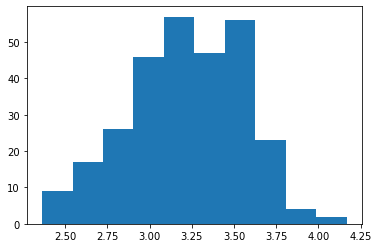

In [238]:
plt.hist(logx)
stats.skew(logx)

(array([ 1.,  2.,  1.,  7., 12., 25., 54., 85., 82., 18.]),
 array([-0.45886588, -0.45317642, -0.44748695, -0.44179749, -0.43610802,
        -0.43041855, -0.42472909, -0.41903962, -0.41335015, -0.40766069,
        -0.40197122]),
 <a list of 10 Patch objects>)

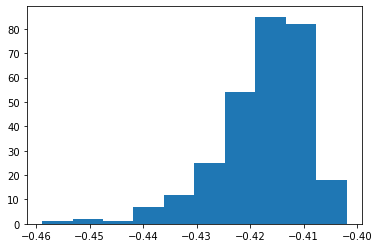

In [182]:
plt.hist(logy)
# stats.skew(logy)

In [164]:
np.cov(logx,logy)

array([[0.1172836 , 0.07829713],
       [0.07829713, 0.05265241]])

In [165]:
np.corrcoef(logx,logy)

array([[1.        , 0.99636408],
       [0.99636408, 1.        ]])

In [166]:
spearmanr(logx,logy)

SpearmanrResult(correlation=0.9957918087481459, pvalue=7.515896218706564e-298)

## Hypothesis testing J&I (6/13 exercise) ##

(array([25., 22.,  7.,  3.,  2.,  1.,  3.,  0.,  0.,  2.]),
 array([ 18.8904247 ,  28.54944175,  38.2084588 ,  47.86747584,
         57.52649289,  67.18550994,  76.84452699,  86.50354404,
         96.16256108, 105.82157813, 115.48059518]),
 <a list of 10 Patch objects>)

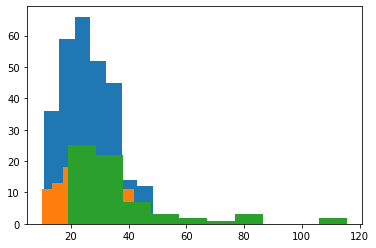

In [31]:
# Run hypothesis test on WT vs vph1-GFP vs vac14 cell volume
WT_cell_vol = cell_filt_WT['Volume (um^3)'] # non-normally distributed
plt.hist(WT_cell_vol)

# stats.skewtest(WT_cell_vol) # stat 4.4, p = 1.1e-5
# stats.normaltest(WT_cell_vol) # stat 23.55, p = 7.7e-6
# stats.shapiro(WT_cell_vol) # stat 0.97, p=7.1e-6
# WT_cell_vol.var() # 79.5
# WT_cell_vol.std() # 8.92


vph1_cell_vol = cell_filt_vph1gfp['Volume (um^3)'] # normally distributed
plt.hist(vph1_cell_vol)

# stats.skewtest(vph1_cell_vol) # stat 0.57, p = 0.57
# stats.normaltest(vph1_cell_vol) # stat 11.27, p = 0.004
# stats.shapiro(vph1_cell_vol) # stat 0.97, p=0.03
# vph1_cell_vol.var() # 78.9
# vph1_cell_vol.std() # 8.88  # variances are equivalent

vac14_cell_vol = cell_filt_vac14['Volume (um^3)'] # non-normally distributed
plt.hist(vac14_cell_vol)

# stats.skewtest(vac14_cell_vol) # stat 5.46, p = 4.72e-8
# stats.normaltest(vac14_cell_vol) # stat 44.85, p = 1.82e-10
# stats.shapiro(vac14_cell_vol) # stat 0.71, p=5.36e-10
# vac14_cell_vol.var() # 409.9
# vac14_cell_vol.std() # 20.25  # variances are not equivalent


In [32]:
stats.mannwhitneyu(WT_cell_vol,vph1_cell_vol) #stat 19748, p=0.48, NS
stats.mannwhitneyu(vph1_cell_vol,vac14_cell_vol) #stat 2814, p=0.9.43e-6, S***
stats.mannwhitneyu(WT_cell_vol,vac14_cell_vol) #stat 5656, p=3.61e-7, S***

MannwhitneyuResult(statistic=5656.0, pvalue=3.606686810155934e-07)

In [33]:
stats.kruskal(WT_cell_vol,vph1_cell_vol,vac14_cell_vol) # stat 25.25, p=3.27e-6 S***
# stats.tukey_hsd(WT_cell_vol,vph1_cell_vol)

KruskalResult(statistic=25.251502958865558, pvalue=3.286289374340163e-06)

In [45]:
# sp.posthoc_dunn([WT_cell_vol,vph1_cell_vol,vac14_cell_vol],p_adjust='bonferroni') # WT-vac14 p=3e-6; vph1-vac14 p=2.6e-5
sp.posthoc_dunn([WT_cell_vol,vph1_cell_vol,vac14_cell_vol]) # WT-vac14 p=1e-6; vph1-vac14 p=9e-6

,1,2,3
1,1.000000,0.994898,0.000001
2,0.994898,1.000000,0.000009
3,0.000001,0.000009,1.000000


In [44]:
stats.levene(vph1_cell_vol,vac14_cell_vol)

LeveneResult(statistic=7.542603918237458, pvalue=0.0065726632102829415)

In [58]:
# now try with data transformations

# log transform

# log_WT = np.log(WT_cell_vol) # becomes normal - p = 0.14
# stats.normaltest(log_WT)

# log_vph1 = np.log(vph1_cell_vol) # becomes not normal - p=0.018
# stats.normaltest(log_vph1)

log_vac14 = np.log(vac14_cell_vol) # still not normal - p=1.5e-4
stats.normaltest(log_vac14)

NormaltestResult(statistic=17.570664224841455, pvalue=0.00015296030534524488)

In [60]:
# sqrt transform

def sqrt_list(data):
    sqrt_data = []
    for x in data:
        sqrt_data.append(math.sqrt(x))
        
    return(sqrt_data)
        
sqrt_WT = sqrt_list(WT_cell_vol)
sqrt_vph1 = sqrt_list(vph1_cell_vol)
sqrt_vac14 = sqrt_list(vac14_cell_vol)

stats.normaltest(sqrt_WT) # normal - p=0.24
stats.normaltest(sqrt_vph1) # not normal - p=0.009
stats.normaltest(sqrt_vac14) # not normal - p=2.2e-7

NormaltestResult(statistic=30.625745070674874, pvalue=2.237195596424214e-07)

## Multivariate analysis ##

In [285]:
# covariance matrix
all_vols_cols = list(all_vols_df.columns)
all_vols_df.cov()

,Cell Volume (um^3),Nucleus Volume (um^3),Vacuole Sum Volume (um^3),LD Sum Volume (um^3),N+V,Sum Organelles,Cyto_N,Cyto_V,Cyto_LD,Cyto_NV,Cyto_Organelles,V:C,N:C,LD:C,Organelles:Cell,Cyto_Organelles:Cell
Cell Volume (um^3),137.005583,3.556401,66.231621,0.280446,69.788022,70.068467,133.449183,70.773963,136.725138,67.217562,66.937116,0.762232,-0.066699,-0.002065,0.693468,-0.693468
Nucleus Volume (um^3),3.556401,0.261470,1.111085,0.013656,1.372555,1.386211,3.294931,2.445316,3.542744,2.183846,2.170189,0.013142,0.002840,0.000132,0.016114,-0.016114
Vacuole Sum Volume (um^3),66.231621,1.111085,37.595631,0.102172,38.706716,38.808888,65.120536,28.635990,66.129449,27.524905,27.422732,0.434729,-0.041662,-0.001650,0.391417,-0.391417
LD Sum Volume (um^3),0.280446,0.013656,0.102172,0.002075,0.115829,0.117904,0.266789,0.178274,0.278371,0.164617,0.162542,0.001203,0.000031,0.000044,0.001277,-0.001277
N+V,69.788022,1.372555,38.706716,0.115829,40.079271,40.195100,68.415467,31.081305,69.672193,29.708751,29.592922,0.447871,-0.038822,-0.001518,0.407531,-0.407531
Sum Organelles,70.068467,1.386211,38.808888,0.117904,40.195100,40.313003,68.682256,31.259579,69.950563,29.873368,29.755464,0.449073,-0.038791,-0.001474,0.408808,-0.408808
Cyto_N,133.449183,3.294931,65.120536,0.266789,68.415467,68.682256,130.154252,68.328647,133.182393,65.033716,64.766927,0.749090,-0.069539,-0.002197,0.677354,-0.677354
Cyto_V,70.773963,2.445316,28.635990,0.178274,31.081305,31.259579,68.328647,42.137973,70.595689,39.692657,39.514384,0.327503,-0.025037,-0.000416,0.302050,-0.302050
Cyto_LD,136.725138,3.542744,66.129449,0.278371,69.672193,69.950563,133.182393,70.595689,136.446767,67.052945,66.774574,0.761029,-0.066730,-0.002109,0.692191,-0.692191
Cyto_NV,67.217562,2.183846,27.524905,0.164617,29.708751,29.873368,65.033716,39.692657,67.052945,37.508811,37.344194,0.314361,-0.027877,-0.000548,0.285937,-0.285937


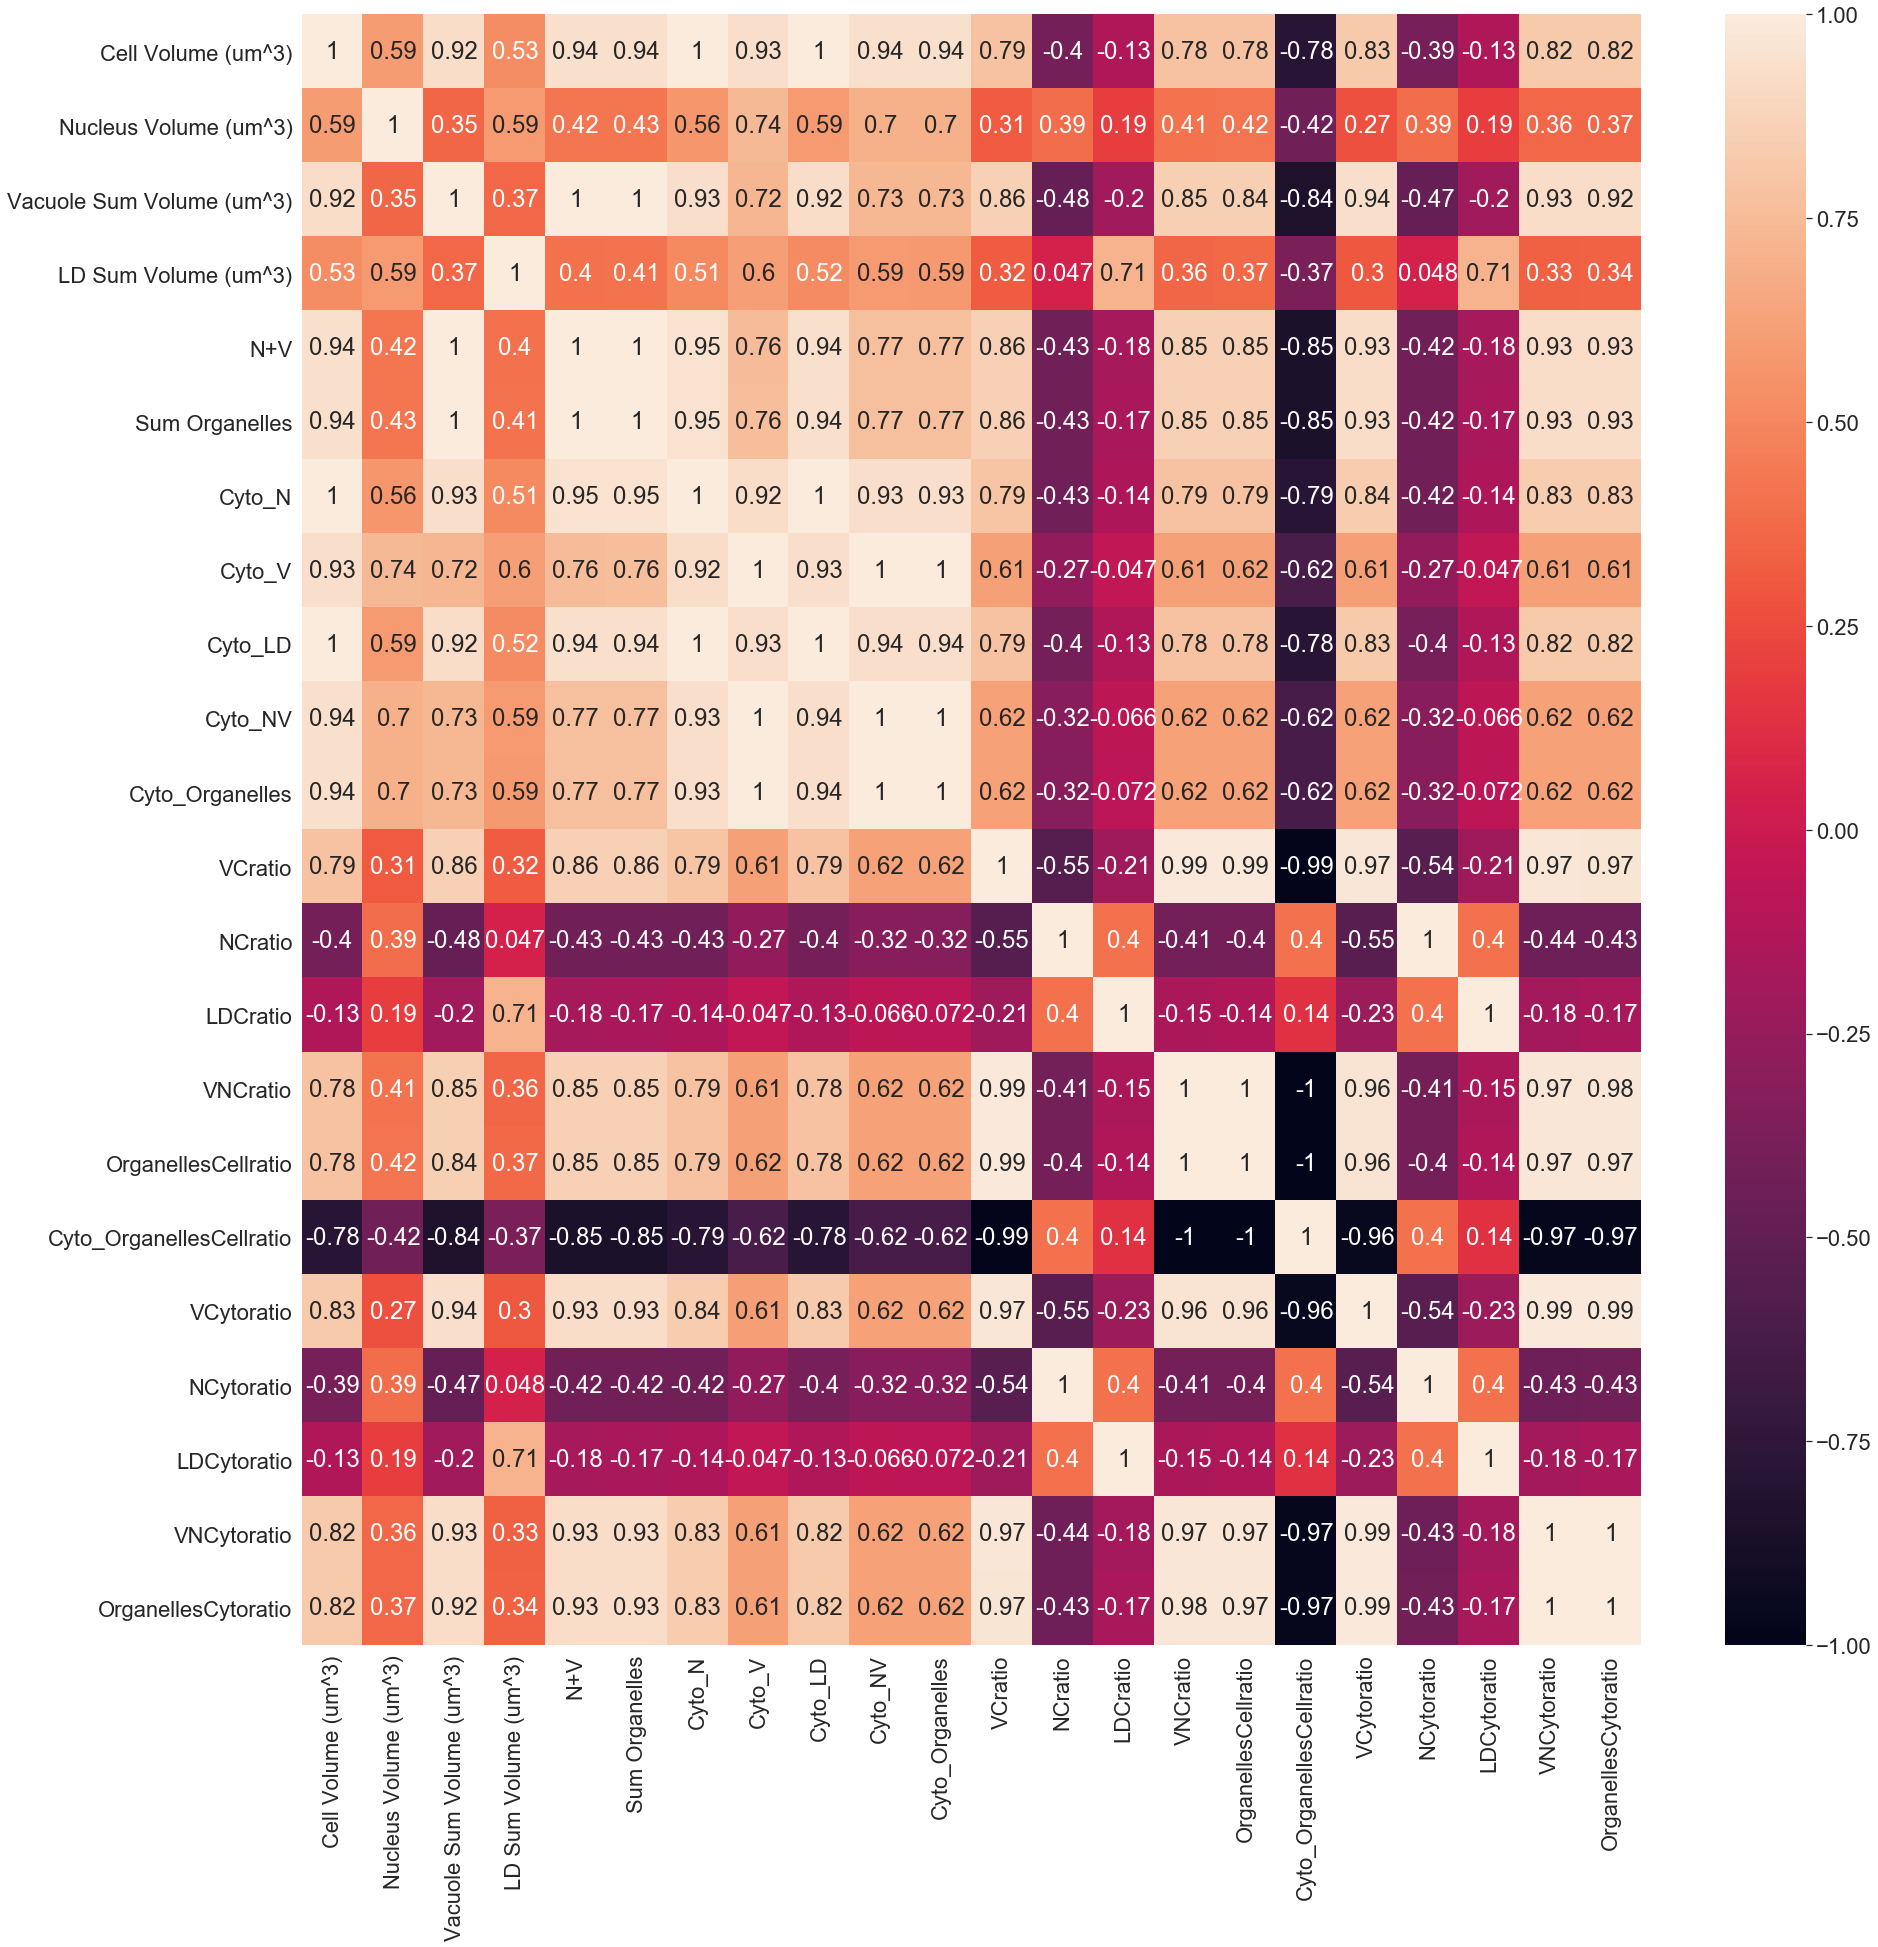

In [123]:
# correlation matrix
all_vols_cormat = all_vols_df.corr(method = 'pearson') # pearson correlation by default

plt.figure(figsize=(30,30))
# plt.matshow(all_vols_cormat)
# plt.colorbar()

sns.set(font_scale = 2)

sns_corr_mat = sns.heatmap(all_vols_cormat, annot=True) #seaborn does a better job, includes values & labels
# increase font size?

fig = sns_corr_mat.get_figure()
# fig.savefig(figs_dir +'all_vols_corr_matrix.jpg')



In [301]:
# WT_vols_df
vph1GFP_vols_df

# WT_vols_df.corrwith(vph1GFP_vols_df)
vph1GFP_vols_df.corrwith(WT_vols_df)

Cell Volume (um^3)          NaN
Nucleus Volume (um^3)       NaN
Vacuole Sum Volume (um^3)   NaN
LD Sum Volume (um^3)        NaN
N+V                         NaN
Sum Organelles              NaN
Cyto_N                      NaN
Cyto_V                      NaN
Cyto_LD                     NaN
Cyto_NV                     NaN
Cyto_Organelles             NaN
V:C                         NaN
N:C                         NaN
LD:C                        NaN
Organelles:Cell             NaN
Cyto_Organelles:Cell        NaN
dtype: float64

In [84]:
# nuclear displacement - calculate nuclear centroid-cell centroid distances

# normalVC_nuc = pd.read_excel(metrics_byVC + 'nuc_normalVC.xlsx')
# highVC_nuc = pd.read_excel(metrics_byVC + 'nuc_highVC.xlsx')

normalVC_nuc['Nuc centroid-Cell centroid distance'] = np.sqrt((normalVC_cell['CX (um)'] - normalVC_nuc['CX (um)'])**2 + (normalVC_cell['CY (um)'] - normalVC_nuc['CY (um)'])**2 + (normalVC_cell['CZ (um)'] - normalVC_nuc['CZ (um)'])**2)

# normalVC_nuc['Nuc centroid-Cell centroid distance'].describe()
normalVC_nuc['NC distance_norm by Cell vol'] = normalVC_nuc['Nuc centroid-Cell centroid distance']/normalVC_cell['Volume (um^3)']
normalVC_nuc['NC distance_norm by Cell long axis'] = normalVC_nuc['Nuc centroid-Cell centroid distance']/normalVC_cell['EllMajRad(Unit)']
normalVC_nuc.drop('sqrt dist', axis=1)
pd.set_option('display.max_columns', None)
# normalVC_nuc.drop('Cell CX-Nuc CX', axis=1)
normalVC_nuc_NCDist = normalVC_nuc


In [91]:
cwd = os.getcwd()
Excelwriter = pd.ExcelWriter(cwd +'/normalVC_nuc_NucCellDist.xlsx', engine = 'xlsxwriter')
normalVC_nuc_NCDist.to_excel(Excelwriter, index=False)
Excelwriter.save()

In [87]:
cwd

'C:\\Users\\Mary\\Documents\\Shared folder\\Data\\SXT\\Technical paper'

In [62]:
highVC_nuc['Nuc centroid-Cell centroid distance'] = np.sqrt((highVC_cell['CX (um)'] - highVC_nuc['CX (um)'])**2 + (highVC_cell['CY (um)'] - highVC_nuc['CY (um)'])**2 + (highVC_cell['CZ (um)'] - highVC_nuc['CZ (um)'])**2)
highVC_nuc['NC distance_norm by Cell vol'] = highVC_nuc['Nuc centroid-Cell centroid distance']/highVC_cell['Volume (um^3)']
highVC_nuc['NC distance_norm by Cell long axis'] = highVC_nuc['Nuc centroid-Cell centroid distance']/highVC_cell['EllMajRad(Unit)']
highVC_nuc
# highVC_nuc['Nuc centroid-Cell centroid distance'].describe()

,level_0,index,Cell ID,Object ID,Volume(Pix),Volume (um^3),CX(pix),CY(pix),CZ(pix),CX (um),CY (um),CZ (um),CX(unit),Surface (um),CY(unit),CZ(unit),Surface(Pix),Surface(Unit),SurfaceNbPix,Feret1X(pix),Feret1Y(pix),Feret1Z(pix),Feret2X(pix),Feret2Y(pix),Feret2Z(pix),Feret1X(unit),Feret1Y(unit),Feret1Z(unit),Feret2X(unit),Feret2Y(unit),Feret2Z(unit),Compactness(Unit),Compactness(Pix),CompactCorr(Pix),Sphericity(Unit),Sphericity(Pix),SpherCorr(Pix),EllSpareness,EllElon,EllFlatness,Nuc centroid-Cell centroid distance,NC distance_norm by Cell vol,NC distance_norm by Cell long axis
0,9,9,BY471A_1026_1_10_pre_rec_7_multi_bin_NUC,BY471A_1026_1_10_pre_rec_7_multi_bin_NUC.tiff_1,49971,1.499130,96.829,115.343,87.279,2.904870,3.460290,2.618370,96.829,31.086000,115.343,87.279,10362,10362,6097,74,119,64,122,108,105,74,119,64,122,108,105,0.254,0.254,0.790,0.633,0.633,0.924,0.982,1.332,1.638,1.129588,0.032468,0.014739
1,11,11,BY471A_1026_1_11_pre_rec_11_multi_bin_NUC,BY471A_1026_1_11_pre_rec_11_multi_bin_NUC.tiff_1,83033,2.490990,51.199,86.126,74.984,1.535970,2.583780,2.249520,51.199,41.574000,86.126,74.984,13858,13858,7808,39,57,68,61,113,87,39,57,68,61,113,87,0.293,0.293,0.969,0.664,0.664,0.990,0.993,1.078,1.218,1.297118,0.030067,0.016025
2,14,14,BY471A_1026_1_11_pre_rec_15_multi_bin_NUC,BY471A_1026_1_11_pre_rec_15_multi_bin_NUC.tiff_1,63449,1.903470,63.458,106.485,79.415,1.903740,3.194550,2.382450,63.458,36.600000,106.485,79.415,12200,12200,6712,82,133,76,49,71,79,82,133,76,49,71,79,0.251,0.251,0.853,0.631,0.631,0.948,0.980,1.468,1.256,1.271654,0.029004,0.015046
3,23,23,BY471A_1026_1_13_pre_rec_10_multi_bin_NUC,BY471A_1026_1_13_pre_rec_10_multi_bin_NUC.tiff_1,60851,1.825530,56.227,101.107,118.915,1.686810,3.033210,3.567450,56.227,36.042000,101.107,118.915,12014,12014,6304,53,127,103,59,76,135,53,127,103,59,76,135,0.242,0.242,0.880,0.623,0.623,0.958,0.995,1.112,1.558,1.451887,0.034838,0.018789
4,42,42,BY471A_1026_1_14_pre_rec_23_multi_bin_NUC,BY471A_1026_1_14_pre_rec_23_multi_bin_NUC.tiff_1,42268,1.268040,52.694,92.202,103.348,1.580820,2.766060,3.100440,52.694,28.698000,92.202,103.348,9566,9566,5119,31,91,82,71,95,124,31,91,82,71,95,124,0.231,0.231,0.814,0.613,0.613,0.934,0.993,1.130,1.770,1.337385,0.038041,0.017870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,407,421,VaCL4_1361_8_pre_rec_0_multi_bin_NUC,VaCL4_1361_8_pre_rec_0_multi_bin_NUC.tiff_1,75501,2.282395,70.021,50.627,94.275,2.116735,1.530454,2.849933,70.021,39.468288,50.627,94.275,13056,13056,7343,45,52,78,95,49,115,45,52,78,95,49,115,0.290,0.290,0.962,0.662,0.662,0.987,0.993,1.172,1.210,1.191027,0.029985,0.015757
58,410,424,VaCL4_1361_8_pre_rec_7_multi_bin_NUC,VaCL4_1361_8_pre_rec_7_multi_bin_NUC.tiff_1,73759,2.229735,54.539,59.764,67.743,1.648714,1.806666,2.047871,54.539,41.318364,59.764,67.743,13668,13668,7287,70,65,38,38,52,97,70,65,38,38,52,97,0.241,0.241,0.864,0.622,0.622,0.953,0.989,1.424,1.307,1.363874,0.030739,0.017707
59,412,426,VaCL4_1361_9_pre_rec_1_multi_bin_NUC,VaCL4_1361_9_pre_rec_1_multi_bin_NUC.tiff_1,64387,1.946419,63.636,89.196,157.968,1.923716,2.696395,4.775373,63.636,37.170808,89.196,157.968,12296,12296,6908,57,58,145,74,124,166,57,58,145,74,124,166,0.252,0.252,0.838,0.632,0.632,0.943,0.992,1.450,1.403,1.923735,0.029779,0.020017
60,413,427,VaCL4_1361_9_pre_rec_4_multi_bin_NUC,VaCL4_1361_9_pre_rec_4_multi_bin_NUC.tiff_1,84988,2.569187,56.413,101.668,72.450,1.705365,3.073424,2.190164,56.413,43.603752,101.668,72.450,14424,14424,8153,69,80,52,47,123,99,69,80,52,47,123,99,0.272,0.272,0.898,0.648,0.648,0.965,0.990,1.110,1.435,1.743203,0.030910,0.018928


In [92]:
Excelwriter = pd.ExcelWriter(cwd +'/highVC_nuc_NucCellDist.xlsx', engine = 'xlsxwriter')
highVC_nuc.to_excel(Excelwriter, index=False)
Excelwriter.save()

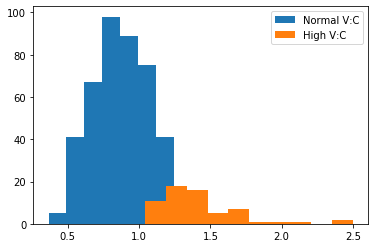

In [32]:
#distance is definitely higher for high Vac, normalize?
plt.hist(normalVC_nuc['Nuc centroid-Cell centroid distance'])
plt.hist(highVC_nuc['Nuc centroid-Cell centroid distance'])
plt.legend(['Normal V:C', 'High V:C'])

(array([ 4.,  4.,  8., 15., 14.,  9.,  6.,  1.,  0.,  1.]),
 array([0.02027551, 0.02361138, 0.02694724, 0.0302831 , 0.03361897,
        0.03695483, 0.04029069, 0.04362656, 0.04696242, 0.05029828,
        0.05363415]),
 <a list of 10 Patch objects>)

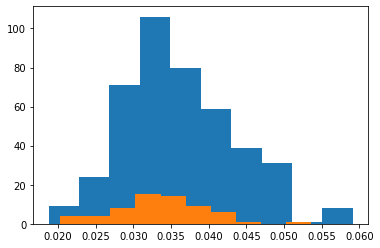

In [65]:
plt.hist(normalVC_nuc['NC distance_norm by Cell vol'])
plt.hist(highVC_nuc['NC distance_norm by Cell vol'])

(array([ 5., 11., 11., 10.,  8.,  8.,  0.,  5.,  2.,  2.]),
 array([0.01456835, 0.01532528, 0.01608222, 0.01683915, 0.01759609,
        0.01835302, 0.01910996, 0.0198669 , 0.02062383, 0.02138077,
        0.0221377 ]),
 <a list of 10 Patch objects>)

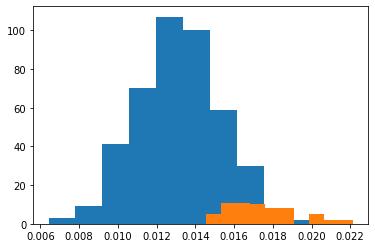

In [63]:
plt.hist(normalVC_nuc['NC distance_norm by Cell long axis'])
plt.hist(highVC_nuc['NC distance_norm by Cell long axis'])

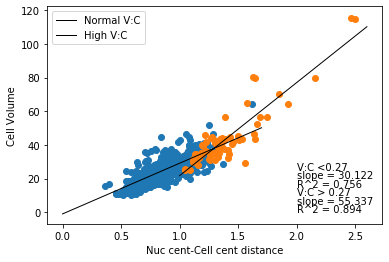

In [98]:
x = normalVC_nuc['Nuc centroid-Cell centroid distance']
y = normalVC_vol_rat['Cell Volume (um^3)']

plt.scatter(normalVC_nuc['Nuc centroid-Cell centroid distance'],normalVC_vol_rat['Cell Volume (um^3)'])
plt.ylabel('Cell Volume')
plt.xlabel('Nuc cent-Cell cent distance')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,1.7)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(2,25,'V:C <0.27',c='k')
plt.text(2,20,'slope = ' + str(round(b,3)),c='k')
plt.text(2,15,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x1 = highVC_nuc['Nuc centroid-Cell centroid distance']
y1 = highVC_vol_rat['Cell Volume (um^3)']
plt.scatter(highVC_nuc['Nuc centroid-Cell centroid distance'], highVC_vol_rat['Cell Volume (um^3)'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(1.0,2.6)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(2,10,'V:C > 0.27',c='k')
plt.text(2,5,'slope = ' + str(round(b,3)),c='k')
plt.text(2,0,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])


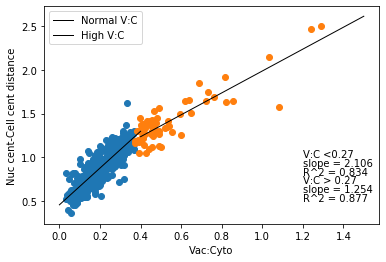

In [116]:
y = normalVC_nuc['Nuc centroid-Cell centroid distance']
x = normalVC_vol_rat['VCytoratio']

plt.scatter(normalVC_vol_rat['VCytoratio'],normalVC_nuc['Nuc centroid-Cell centroid distance'])
plt.ylabel('Nuc cent-Cell cent distance')
plt.xlabel('Vac:Cyto')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.4)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.2,1,'V:C <0.27',c='k')
plt.text(1.2,0.9,'slope = ' + str(round(b,3)),c='k')
plt.text(1.2,0.8,'R^2 = ' + str(round(r2[0][1],3)),c='k')

y1 = highVC_nuc['Nuc centroid-Cell centroid distance']
x1 = highVC_vol_rat['VCytoratio']
plt.scatter(highVC_vol_rat['VCytoratio'],highVC_nuc['Nuc centroid-Cell centroid distance'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0.4,1.5)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.2,0.7,'V:C > 0.27',c='k')
plt.text(1.2,0.6,'slope = ' + str(round(b,3)),c='k')
plt.text(1.2,0.5,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])



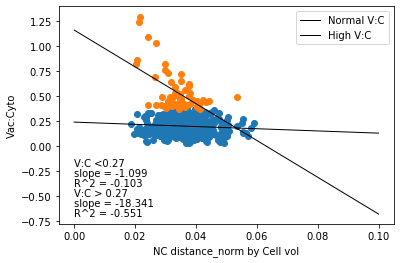

In [70]:
x = normalVC_nuc['NC distance_norm by Cell vol']
y = normalVC_vol_rat['VCytoratio']

plt.scatter(normalVC_nuc['NC distance_norm by Cell vol'],normalVC_vol_rat['VCytoratio'])
plt.ylabel('Vac:Cyto')
plt.xlabel('NC distance_norm by Cell vol')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.1)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0,-0.2,'V:C <0.27',c='k')
plt.text(0,-0.3,'slope = ' + str(round(b,3)),c='k')
plt.text(0,-0.4,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x1 = highVC_nuc['NC distance_norm by Cell vol']
y1 = highVC_vol_rat['VCytoratio']
plt.scatter(highVC_nuc['NC distance_norm by Cell vol'], highVC_vol_rat['VCytoratio'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0,0.1)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0,-0.5,'V:C > 0.27',c='k')
plt.text(0,-0.6,'slope = ' + str(round(b,3)),c='k')
plt.text(0,-0.7,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])

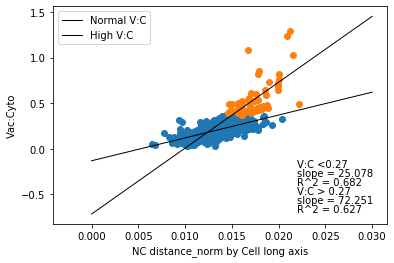

In [73]:
x = normalVC_nuc['NC distance_norm by Cell long axis']
y = normalVC_vol_rat['VCytoratio']

plt.scatter(normalVC_nuc['NC distance_norm by Cell long axis'],normalVC_vol_rat['VCytoratio'])
plt.ylabel('Vac:Cyto')
plt.xlabel('NC distance_norm by Cell long axis')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,0.03)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.022,-0.2,'V:C <0.27',c='k')
plt.text(0.022,-0.3,'slope = ' + str(round(b,3)),c='k')
plt.text(0.022,-0.4,'R^2 = ' + str(round(r2[0][1],3)),c='k')

x1 = highVC_nuc['NC distance_norm by Cell long axis']
y1 = highVC_vol_rat['VCytoratio']
plt.scatter(highVC_nuc['NC distance_norm by Cell long axis'], highVC_vol_rat['VCytoratio'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0,0.03)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(0.022,-0.5,'V:C > 0.27',c='k')
plt.text(0.022,-0.6,'slope = ' + str(round(b,3)),c='k')
plt.text(0.022,-0.7,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])

Text(90, 0.4, 'R^2 = 0.894')

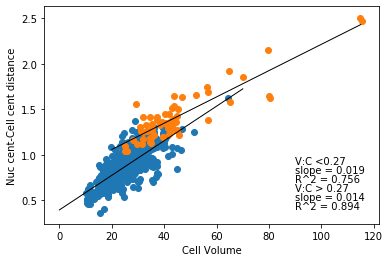

In [138]:
y = normalVC_nuc['Nuc centroid-Cell centroid distance']
x = normalVC_vol_rat['Cell Volume (um^3)']

plt.scatter(normalVC_vol_rat['Cell Volume (um^3)'],normalVC_nuc['Nuc centroid-Cell centroid distance'])
# plt.legend(['Normal V:C', 'High V:C'])
plt.ylabel('Nuc cent-Cell cent distance')
plt.xlabel('Cell Volume')
r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0,70)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(90,0.9,'V:C <0.27',c='k')
plt.text(90,0.8,'slope = ' + str(round(b,3)),c='k')
plt.text(90,0.7,'R^2 = ' + str(round(r2[0][1],3)),c='k')

y1 = highVC_nuc['Nuc centroid-Cell centroid distance']
x1 = highVC_vol_rat['Cell Volume (um^3)']
plt.scatter(highVC_vol_rat['Cell Volume (um^3)'],highVC_nuc['Nuc centroid-Cell centroid distance'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(20,115)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(90,0.6,'V:C > 0.27',c='k')
plt.text(90,0.5,'slope = ' + str(round(b,3)),c='k')
plt.text(90,0.4,'R^2 = ' + str(round(r2[0][1],3)),c='k')

Text(1.05, 0.5, 'R^2 = -0.849')

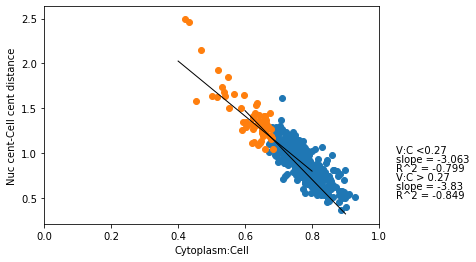

In [137]:
y = normalVC_nuc['Nuc centroid-Cell centroid distance']
x = normalVC_vol_rat['Cyto_OrganellesCellratio']

plt.scatter(normalVC_vol_rat['Cyto_OrganellesCellratio'],normalVC_nuc['Nuc centroid-Cell centroid distance'])
plt.ylabel('Nuc cent-Cell cent distance')
plt.xlabel('Cytoplasm:Cell')
plt.xlim([0,1])

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0.4,0.8)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,1,'V:C <0.27',c='k')
plt.text(1.05,0.9,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.8,'R^2 = ' + str(round(r2[0][1],3)),c='k')

y1 = highVC_nuc['Nuc centroid-Cell centroid distance']
x1 = highVC_vol_rat['Cyto_OrganellesCellratio']
plt.scatter(highVC_vol_rat['Cyto_OrganellesCellratio'], highVC_nuc['Nuc centroid-Cell centroid distance'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0.6,0.9)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,0.7,'V:C > 0.27',c='k')
plt.text(1.05,0.6,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.5,'R^2 = ' + str(round(r2[0][1],3)),c='k')

# plt.legend(['Normal V:C', 'High V:C'])

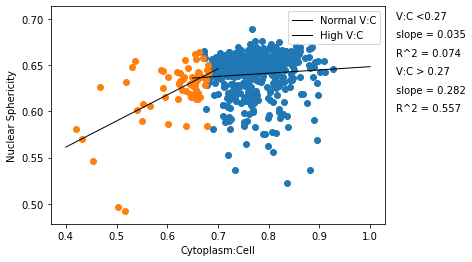

In [111]:
y = normalVC_nuc['Sphericity(Pix)']
x = normalVC_vol_rat['Cyto_OrganellesCellratio']

plt.scatter(normalVC_vol_rat['Cyto_OrganellesCellratio'],normalVC_nuc['Sphericity(Pix)'])
plt.ylabel('Nuclear Sphericity')
plt.xlabel('Cytoplasm:Cell')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0.65,1)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,0.7,'V:C <0.27',c='k')
plt.text(1.05,0.68,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.66,'R^2 = ' + str(round(r2[0][1],3)),c='k')

y1 = highVC_nuc['Sphericity(Pix)']
x1 = highVC_vol_rat['Cyto_OrganellesCellratio']
plt.scatter(highVC_vol_rat['Cyto_OrganellesCellratio'],highVC_nuc['Sphericity(Pix)'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0.4,0.7)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,0.64,'V:C > 0.27',c='k')
plt.text(1.05,0.62,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.6,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])

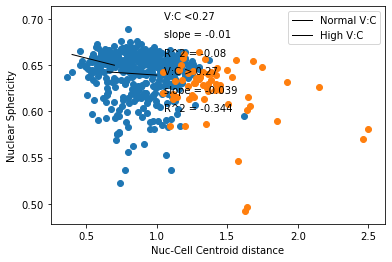

In [123]:
y = normalVC_nuc['Sphericity(Pix)']
x = normalVC_nuc['Nuc centroid-Cell centroid distance']

plt.scatter(normalVC_nuc['Nuc centroid-Cell centroid distance'],normalVC_nuc['Sphericity(Pix)'])
plt.ylabel('Nuclear Sphericity')
plt.xlabel('Nuc-Cell Centroid distance')

r2 = np.corrcoef(x,y)
# r2[0][1]
b,a = np.polyfit(x,y,deg=1)
xseq = np.linspace(0.65,1)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,0.7,'V:C <0.27',c='k')
plt.text(1.05,0.68,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.66,'R^2 = ' + str(round(r2[0][1],3)),c='k')

y1 = highVC_nuc['Sphericity(Pix)']
x1 = highVC_nuc['Nuc centroid-Cell centroid distance']
plt.scatter(highVC_nuc['Nuc centroid-Cell centroid distance'],highVC_nuc['Sphericity(Pix)'])

r2 = np.corrcoef(x1,y1)
# r2[0][1]
b,a = np.polyfit(x1,y1,deg=1)
xseq = np.linspace(0.4,0.7)
plt.plot(xseq,a+b*xseq,color='k',lw=1)
# plt.legend(['slope = ' + str(round(b,3)), 'R^2 = ' + str(round(r2[0][1],3))],loc = 'lower right')
plt.text(1.05,0.64,'V:C > 0.27',c='k')
plt.text(1.05,0.62,'slope = ' + str(round(b,3)),c='k')
plt.text(1.05,0.6,'R^2 = ' + str(round(r2[0][1],3)),c='k')

plt.legend(['Normal V:C', 'High V:C'])